# VISTAB

Visualize or tabulate results.

In [ ]:
from py_env_hpc import *

## 1. Visualize the IDEA!

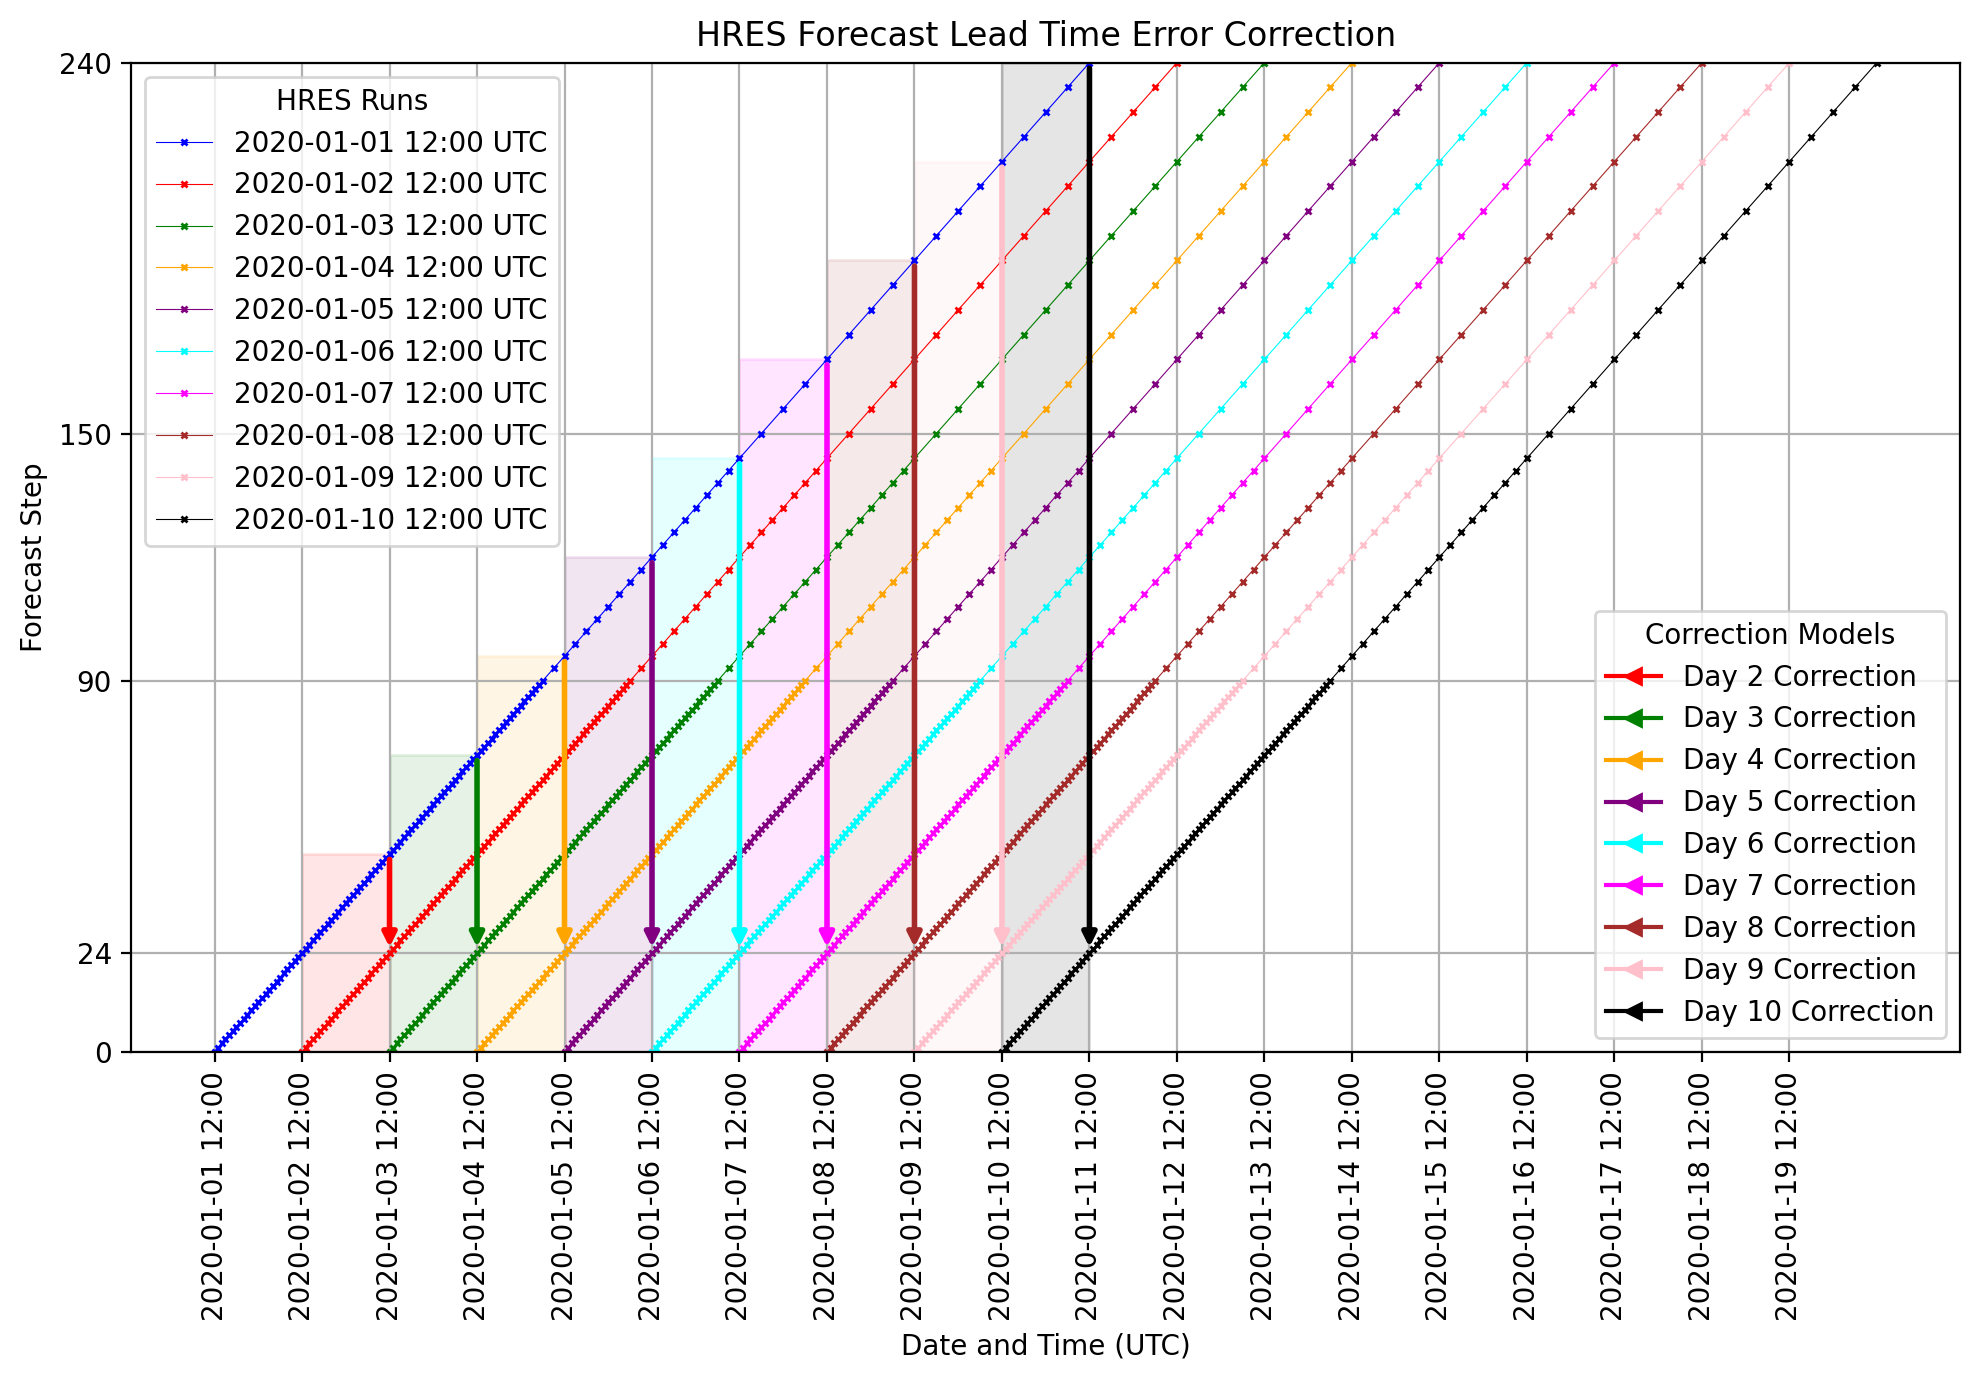

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
import numpy as np

def generate_forecast_times(start_date, forecast_steps):
    return [start_date + timedelta(hours=step) for step in forecast_steps]

def plot_forecast(run_times, forecast_steps, label, color):
    plt.plot(run_times, forecast_steps, marker='x', linestyle='-', color=color, label=label, ms=2, lw=0.4)

def set_plot_properties(start_date, end_date):
    plt.title('HRES Forecast Lead Time Error Correction')
    plt.xlabel('Date and Time (UTC)')
    plt.ylabel('Forecast Step')

    six_hourly_ticks = [start_date + timedelta(hours=i*24) for i in range(int((end_date - start_date).total_seconds() // 3600 // 24))]
    plt.xticks(six_hourly_ticks, [time.strftime('%Y-%m-%d %H:%M') for time in six_hourly_ticks], rotation=90)
    plt.ylim(0, 240)
    plt.yticks([0, 24, 90, 150, 240])
    plt.legend(title='HRES Runs', loc='upper left')
    plt.grid(True)
    plt.tight_layout()

# Define the starting date and time for each run
start_dates = [
    datetime(year=2020, month=1, day=1, hour=12),
    datetime(year=2020, month=1, day=2, hour=12),
    datetime(year=2020, month=1, day=3, hour=12),
    datetime(year=2020, month=1, day=4, hour=12),
    datetime(year=2020, month=1, day=5, hour=12),
    datetime(year=2020, month=1, day=6, hour=12),
    datetime(year=2020, month=1, day=7, hour=12),
    datetime(year=2020, month=1, day=8, hour=12),
    datetime(year=2020, month=1, day=9, hour=12),
    datetime(year=2020, month=1, day=10, hour=12)
]

# End date and time
end_date = datetime(year=2020, month=1, day=20, hour=12)

# Step frequency for 12 UTC for each run
forecast_steps = [list(range(0, 91)) + list(range(93, 145, 3)) + list(range(150, 241, 6)) for _ in range(10)]

# Calculate the date and time for each forecast step for each run
forecast_times = [generate_forecast_times(start_date, steps) for start_date, steps in zip(start_dates, forecast_steps)]

# Plotting the forecast steps against the corresponding times for each run
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'black']
labels = ['2020-01-01 12:00 UTC', '2020-01-02 12:00 UTC', '2020-01-03 12:00 UTC', '2020-01-04 12:00 UTC', '2020-01-05 12:00 UTC', '2020-01-06 12:00 UTC', '2020-01-07 12:00 UTC', '2020-01-08 12:00 UTC', '2020-01-09 12:00 UTC', '2020-01-10 12:00 UTC']

plt.figure(figsize=(10, 7), dpi=200)

for run_times, steps, label, color in zip(forecast_times, forecast_steps, labels, colors):
    plot_forecast(run_times, steps, label, color)

index_24 = 24

# Plot correction models
arrow_handles = []
for c, run_times in enumerate(forecast_times):
    correction_time = run_times[index_24]
    plt.annotate('', xy=(run_times[index_24], 240 + index_24 * (c - 9)), xytext=(run_times[index_24], index_24),
                 arrowprops=dict(arrowstyle='<|-', color=colors[c], linewidth=2),
                 annotation_clip=False)
    arrow_handles.append(Line2D([0], [0], linestyle='-', color=colors[c], marker='<', lw=1.5))
    
    if c >= 1:
        plt.axvspan(correction_time - timedelta(hours=24), correction_time, color=colors[c], alpha=0.1, ymax=(240 + index_24 * (c - 9)) / 240)

correction_labels = ['Day {} Correction'.format(day) for day in np.arange(2, 12)]

# Create a separate legend for correction arrows
arrow_legend = plt.legend(arrow_handles[1:], correction_labels, loc='lower right', title='Correction Models')
plt.gca().add_artist(arrow_legend)

set_plot_properties(start_dates[0], end_date)

# Save figure with white background
plt.savefig(DUMP_PLOT+'/idea.png')
plt.show()


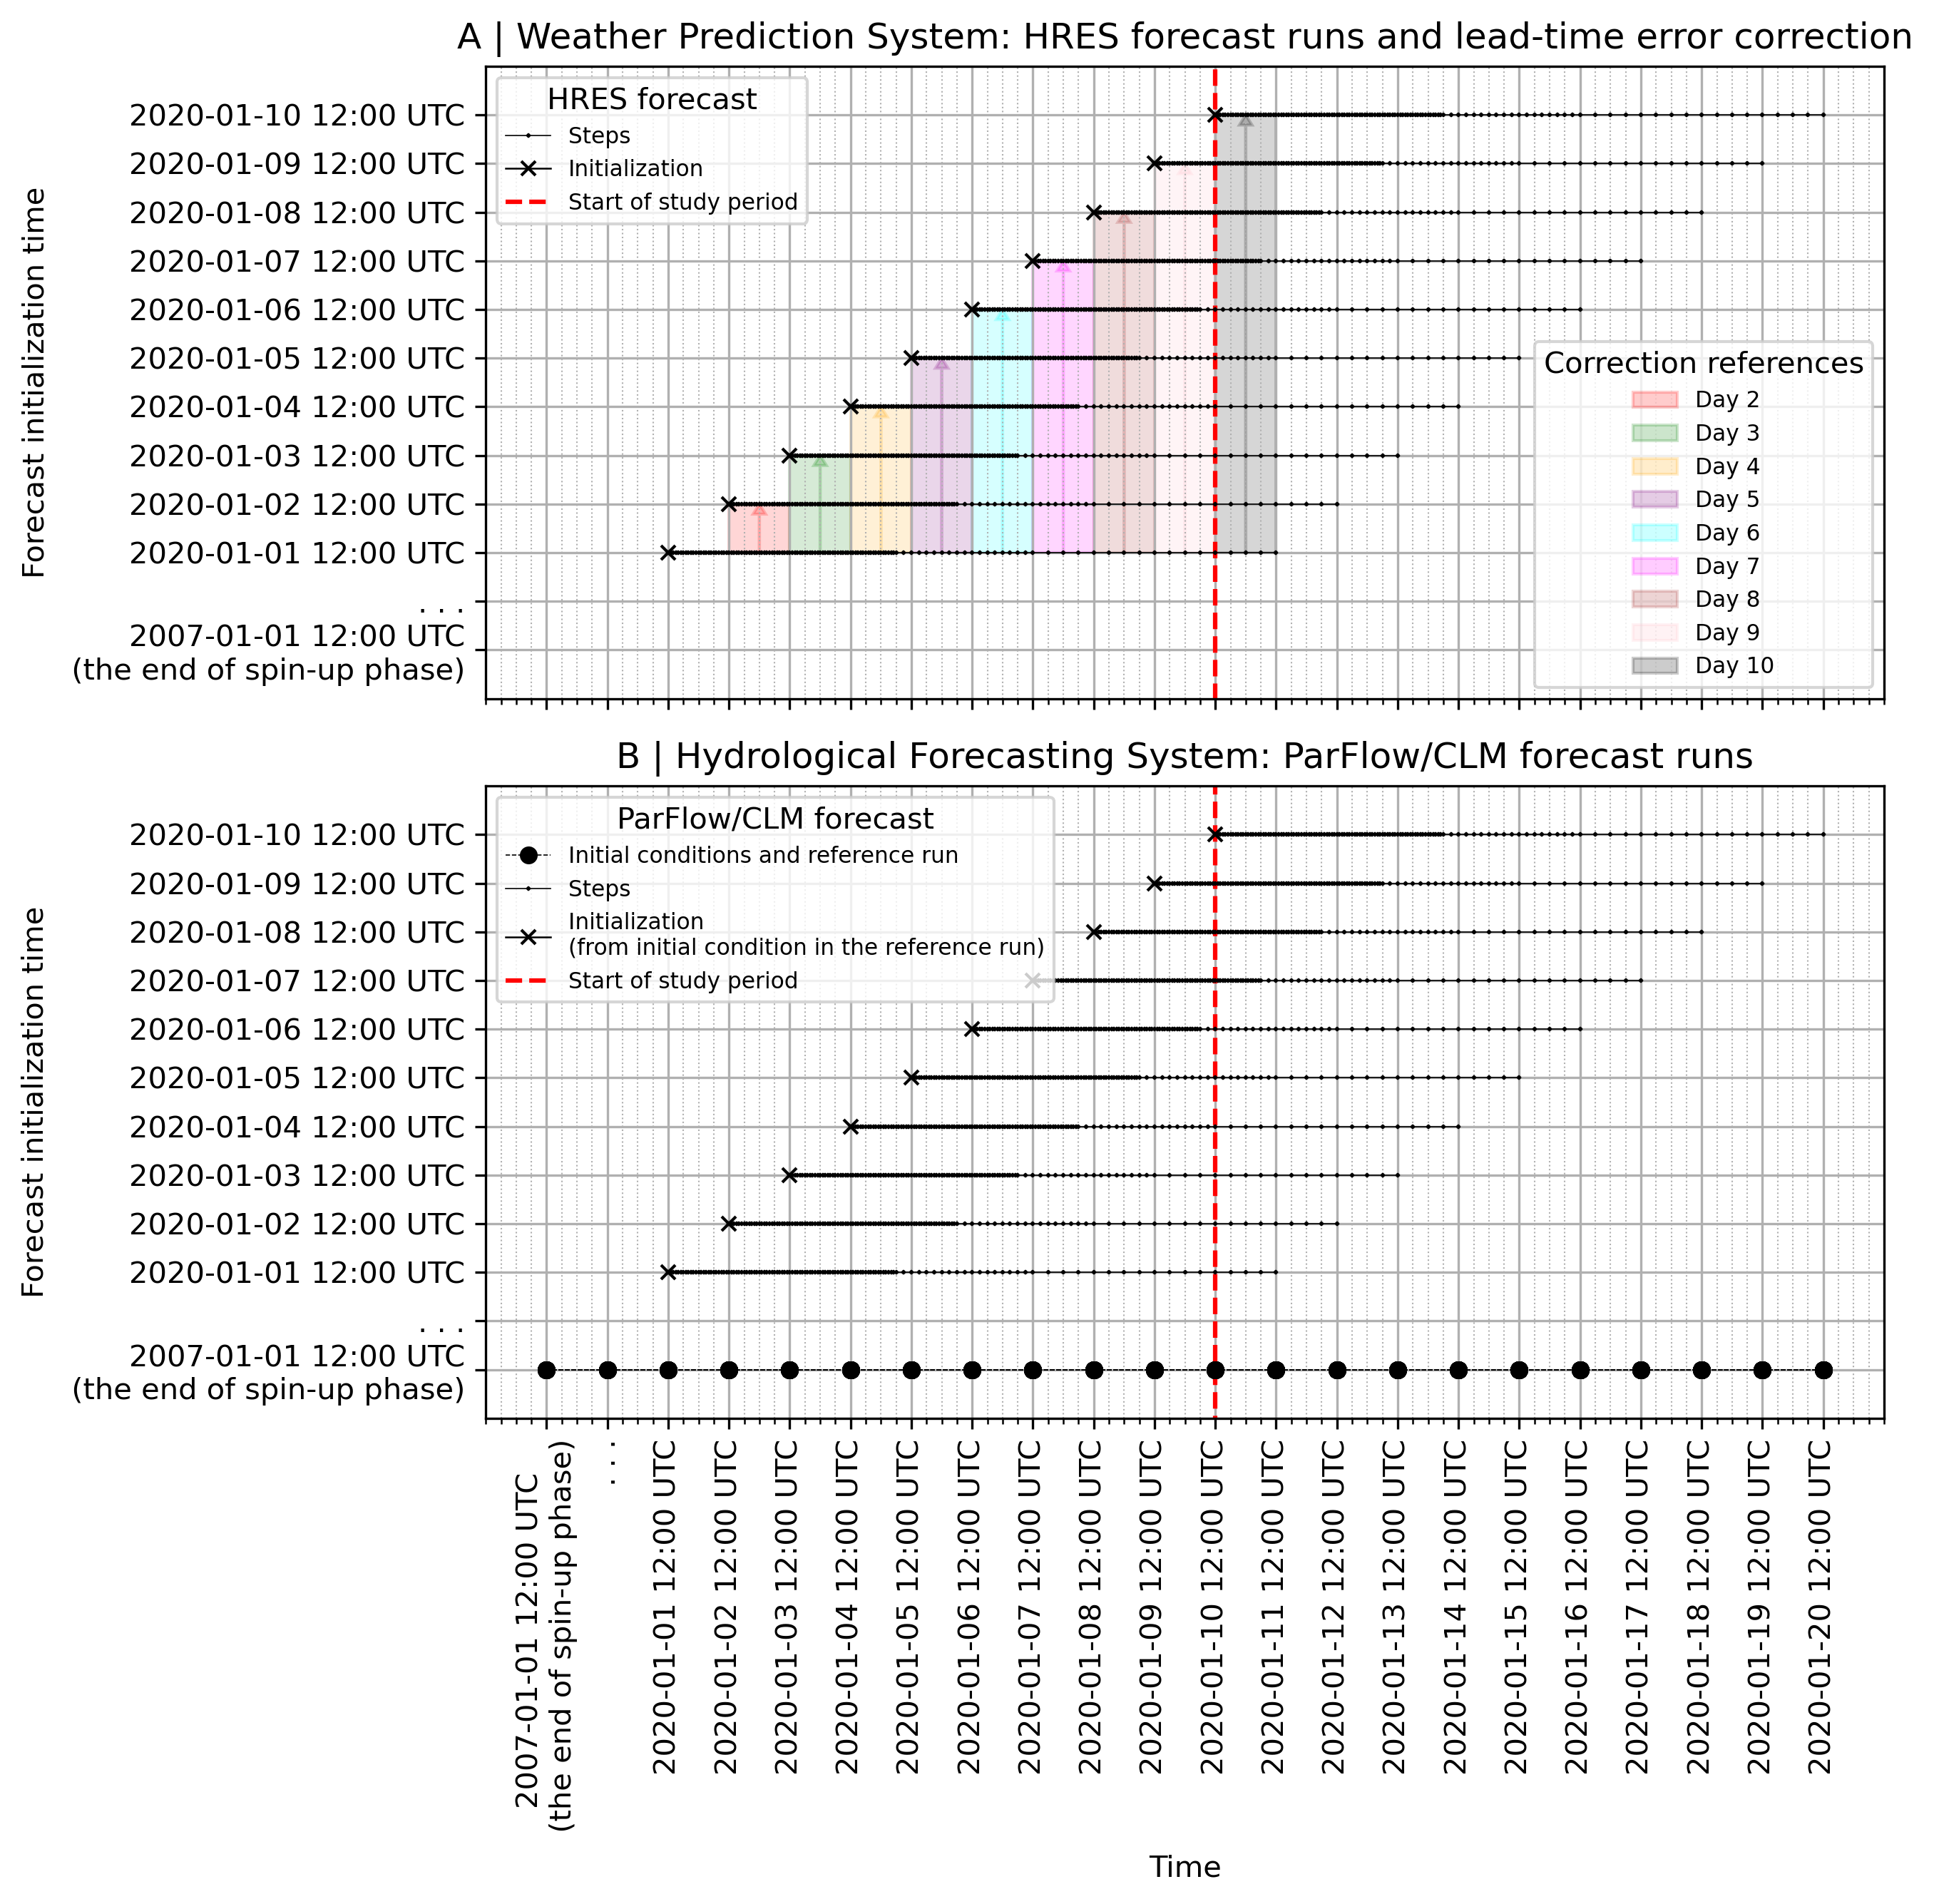

In [172]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

# functions:
def generate_forecast_times(start_date, forecast_steps):
    return [start_date + timedelta(hours=step) for step in forecast_steps]

def plot_forecast(ax, x_start, forecast_steps, label, color):
    x = np.array(forecast_steps) + x_start
    y = np.ones_like(x) * x_start
    line, = ax.plot(x, y, marker='x', linestyle='-', color="black", ms=1, lw=0.4)
    big_cross, = ax.plot(x[0], y[0], marker='x', color="black", ms=5, lw=0.6)
    return line, big_cross

def plot_hydro(ax, x_start, forecast_steps, label, color, ticksx_major, include_ref=True):
    x = np.array(forecast_steps) + x_start
    y = np.ones_like(x) * x_start
    line, = ax.plot(x, y, marker='x', linestyle='-', color="black", label=label, ms=1, lw=0.4)
    ax.plot(x[0], y[0], marker='x', linestyle='-', color="black", ms=5, lw=0.6)
    if include_ref:
        ref_y = -48
        line2, = ax.plot(ticksx_major, np.ones_like(ticksx_major) * ref_y, marker='o', linestyle='--', color='black', label='Reference Run', ms=5, lw=0.4)
        return line, line2
    return line, None

def plot_correction_arrows(ax, y_max, y_min, x_start, forecast_steps, color):
    arrow = ax.arrow(x=x_start, y=y_min, dx=0, dy=y_max-y_min, color=color, width=0.1, head_width=5, head_length=5, shape='full', length_includes_head=True, alpha=alpha_corr)
    return arrow

def plot_init_arrows(ax, y_max, y_min, x_start, forecast_steps, color):
    arrow = ax.arrow(x=x_start, y=y_min, dx=0, dy=y_max-y_min, color="black", width=0.1, head_width=5, head_length=5, shape='full', length_includes_head=True, alpha=1)
    return arrow

def set_plot_properties(ax, labelsx, ticksx, labelsy, ticksy, x_axis):
    ax.set_ylabel('Forecast initialization time')
    ax.set_xticks(ticksx)
    if x_axis:
        ax.set_xticklabels(labelsx, rotation=90)
        ax.set_xlabel('Time')
    else:
        ax.set_xticklabels([])
    ax.set_yticks(ticksy)
    ax.set_yticklabels(labelsy)
    ax.grid(axis='y', which="major")
    ax.grid(axis='x', which="major")
    ax.grid(axis='x', which='minor', linestyle=':', linewidth='0.5')
    ax.set_aspect(yaspect)  # Adjust the aspect ratio of the y-axis

# figure and font size settings:
alpha_corr = 0.20
yaspect = 0.80
fc = 0.75  # font coefficient
fscale = 0.9 #figure scale

# dates and etc settings:
initial_date = datetime(year=2020, month=1, day=1, hour=12)
num_dates = 10
xmin = -48
xmax = 480
ymin = -48
ymax = 240
daystep = 24

# Define the starting date and time for each run
start_dates = [initial_date + timedelta(days=i) for i in range(num_dates)]
start_dates_x = [initial_date + timedelta(days=i) for i in range(num_dates * 2)]

# Labels for the y-axis
labelsy = [start_date.strftime('%Y-%m-%d %H:%M UTC') for start_date in start_dates]
labelsx = [start_date.strftime('%Y-%m-%d %H:%M UTC') for start_date in start_dates_x]
correction_labels = ['Day {}'.format(day) for day in np.arange(2, 12)]

# Define the forecast steps
forecast_steps = [list(range(0, 91)) + list(range(93, 145, 3)) + list(range(150, 241, 6)) for _ in range(10)]

# Define the starting points for each line
ticksy_major = np.arange(ymin, ymax, daystep)
ticksx_major = np.arange(xmin, xmax, daystep)

ref_start_date = datetime(year=2007, month=1, day=1, hour=12)  # Reference start date
labelsx = [ref_start_date.strftime('%Y-%m-%d %H:%M UTC') + "\n (the end of spin-up phase)", ". . ."] + labelsx  # Add reference label
labelsy = [ref_start_date.strftime('%Y-%m-%d %H:%M UTC') + "\n (the end of spin-up phase)", ". . ."] + labelsy  # Add reference label

# Plotting the lines
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'black']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12*fscale, 10*fscale), dpi=300)

ax1.set_title('A | Weather Prediction System: HRES forecast runs and lead-time error correction')
ax2.set_title('B | Hydrological Forecasting System: ParFlow/CLM forecast runs')

# study line:
study_line1 = ax1.axvline(x=216, ymin=ymin, ymax=ymax, color='red', linestyle='--')
study_line2 = ax2.axvline(x=216, ymin=ymin, ymax=ymax, color='red', linestyle='--')

# First plot
forecast_handles1 = []
forecast_labels1 = []
big_cross_handle = None

for start, steps, label, color in zip(ticksy_major[2:], forecast_steps, labelsy[2:], colors):
    line, big_cross = plot_forecast(ax1, start, steps, "HRES forecast steps", color)
    if not forecast_handles1:  # Only add one line handle and label for the forecast runs
        forecast_handles1.append(line)
        forecast_labels1.append("HRES forecast steps")
    if big_cross_handle is None:  # Only add one handle and label for the big cross
        big_cross_handle = big_cross

# Set plot properties with correct ticks and labels
set_plot_properties(ax1, labelsx, ticksx_major, labelsy, ticksy_major, x_axis=False)

# Set minor ticks
ax1.xaxis.set_minor_locator(plt.MultipleLocator(6))

# Plot correction arrows and store handles and labels
arrow_handles1 = []
arrow_labels1 = []

for i, (start, label, color, steps) in enumerate(zip(ticksx_major[2:], correction_labels, colors, forecast_steps)):
    ymaxx = ymax - daystep * (10 - i)
    yminn = 0
    arrow = plot_correction_arrows(ax1, ymaxx, yminn, start + daystep / 2, steps, color=color)
    arrow_handles1.append(arrow)
    arrow_labels1.append(label)
    ax1.axvspan(start, start + daystep, ymin=(yminn + daystep * 3) / (ymax - ymin + daystep), ymax=(ymaxx + daystep * 3) / (ymax - ymin + daystep), color=color, alpha=alpha_corr * 0.8)

# Second plot
forecast_handles2 = []
forecast_labels2 = []
line2 = None

for start, steps, label, color in zip(ticksy_major[2:], forecast_steps, labelsy[2:], colors):
    line, line2 = plot_hydro(ax2, start, steps, label, color, ticksx_major, include_ref=True)
    forecast_handles2.append(line)
    forecast_labels2.append(label)

# Set plot properties with correct ticks and labels
set_plot_properties(ax2, labelsx, ticksx_major, labelsy, ticksy_major, x_axis=True)
ax2.xaxis.set_minor_locator(plt.MultipleLocator(6))

# Add legends for HRES forecast runs and correction arrows
legend1 = ax1.legend(forecast_handles1 + [big_cross_handle] + [study_line1], ["Steps", "Initialization", "Start of study period"], title='HRES forecast', loc='upper left', fontsize=fc * 10)
ax1.add_artist(legend1)  # Add the first legend manually
legend2 = ax1.legend(arrow_handles1[1:], arrow_labels1[:-1], title='Correction references', loc='lower right', fontsize=fc * 10)

# Legend for the second plot
if line2 is not None:
    legend3 = ax2.legend([line2] + forecast_handles1 + [big_cross_handle] + [study_line2], ["Initial conditions and reference run", "Steps", "Initialization \n(from initial condition in the reference run)", "Start of study period"], title='ParFlow/CLM forecast', loc='upper left', fontsize=fc * 10)

# Set limits
ax1.set_xlim(xmin - daystep, xmax)
ax1.set_ylim(ymin - daystep, ymax)
ax2.set_xlim(xmin - daystep, xmax)
ax2.set_ylim(ymin - daystep, ymax)

# Save figure with white background
plt.tight_layout()
plt.savefig('images/idea2.png')
plt.show()


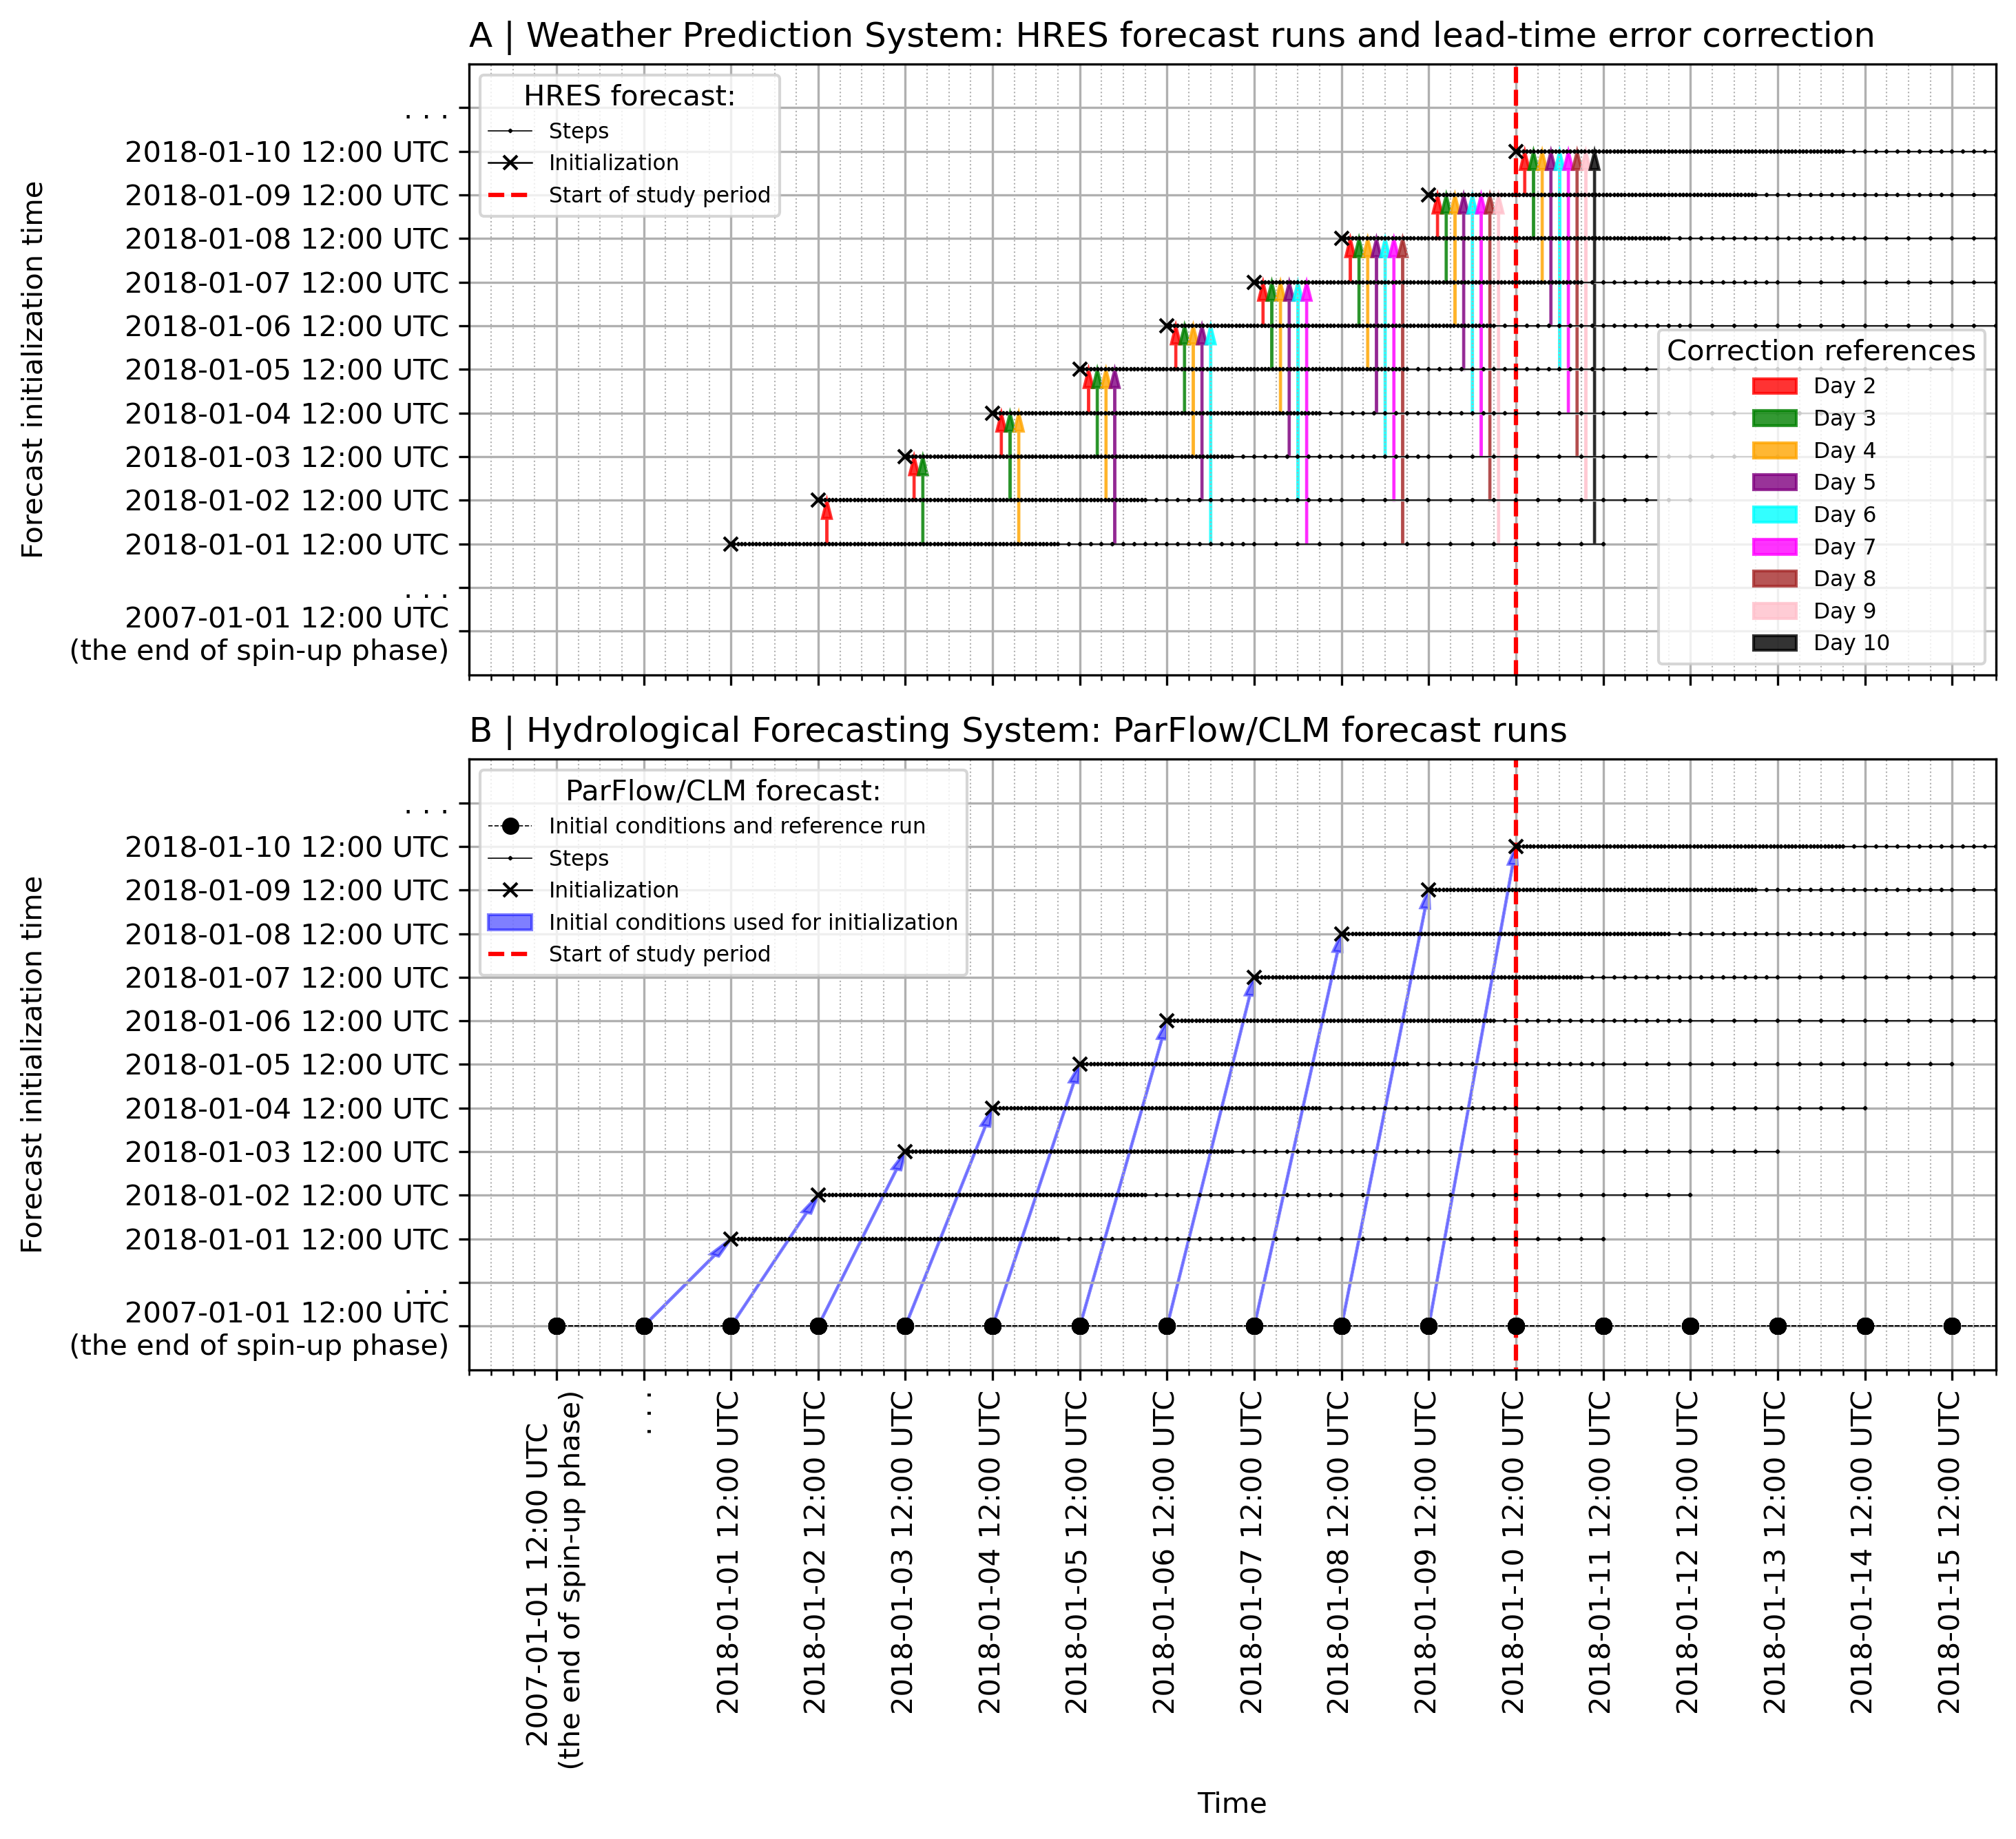

In [175]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

# functions:
def generate_forecast_times(start_date, forecast_steps):
    return [start_date + timedelta(hours=step) for step in forecast_steps]

def plot_forecast(ax, x_start, forecast_steps, label, color):
    x = np.array(forecast_steps) + x_start
    y = np.ones_like(x) * x_start
    line, = ax.plot(x, y, marker='x', linestyle='-', color="black", ms=1, lw=0.4)
    big_cross, = ax.plot(x[0], y[0], marker='x', color="black", ms=5, lw=0.6)
    return line, big_cross

def plot_hydro(ax, x_start, forecast_steps, label, color, ticksx_major, include_ref=True):
    x = np.array(forecast_steps) + x_start
    y = np.ones_like(x) * x_start
    line, = ax.plot(x, y, marker='x', linestyle='-', color="black", label=label, ms=1, lw=0.4)
    ax.plot(x[0], y[0], marker='x', linestyle='-', color="black", ms=5, lw=0.6)
    if include_ref:
        ref_y = -48
        line2, = ax.plot(ticksx_major, np.ones_like(ticksx_major) * ref_y, marker='o', linestyle='--', color='black', label='Reference Run', ms=5, lw=0.4)
        return line, line2
    return line, None

def plot_arrows(ax, y_max, y_min, x_start, dx, forecast_steps, color, alpha):
    arrow = ax.arrow(x=x_start, y=y_min, dx=dx, dy=y_max-y_min, color=color, width=0.1, head_width=2.5, head_length=10, shape='full', length_includes_head=True, alpha=alpha)
    return arrow

def set_plot_properties(ax, labelsx, ticksx, labelsy, ticksy, x_axis):
    ax.set_ylabel('Forecast initialization time')
    ax.set_xticks(ticksx)
    if x_axis:
        ax.set_xticklabels(labelsx, rotation=90)
        ax.set_xlabel('Time')
    else:
        ax.set_xticklabels([])
    ax.set_yticks(ticksy)
    ax.set_yticklabels(labelsy)
    ax.grid(axis='y', which="major")
    ax.grid(axis='x', which="major")
    ax.grid(axis='x', which='minor', linestyle=':', linewidth='0.5')
    ax.set_aspect(yaspect)  # Adjust the aspect ratio of the y-axis

# figure and font size settings:
alpha_corr = 0.80
alpha_init = 0.50
yaspect = 0.50
fc = 0.75  # font coefficient
fscale = 0.9 #figure scale

# dates and etc settings:
daystep = 24
initial_date = datetime(year=2018, month=1, day=1, hour=12)
num_dates = 10
xmin = -2 * daystep
xmax = 21 * daystep
ymin = -2 * daystep
ymax = 11 * daystep

# Define the starting date and time for each run
start_dates = [initial_date + timedelta(days=i) for i in range(num_dates)]
start_dates_x = [initial_date + timedelta(days=i) for i in range(num_dates * 2)]

# Labels for the y-axis
labelsy = [start_date.strftime('%Y-%m-%d %H:%M UTC') for start_date in start_dates]
labelsx = [start_date.strftime('%Y-%m-%d %H:%M UTC') for start_date in start_dates_x]
correction_labels = ['Day {}'.format(day) for day in np.arange(2, 12)]

# Define the forecast steps
forecast_steps = [list(range(0, 91)) + list(range(93, 145, 3)) + list(range(150, 241, 6)) for _ in range(10)]

# Define the starting points for each line
ticksy_major = np.arange(ymin, ymax, daystep)
ticksx_major = np.arange(xmin, xmax, daystep)

ref_start_date = datetime(year=2007, month=1, day=1, hour=12)  # Reference start date
labelsx = [ref_start_date.strftime('%Y-%m-%d %H:%M UTC') + "\n (the end of spin-up phase)", ". . ."] + labelsx + [". . ."] # Add reference label
labelsy = [ref_start_date.strftime('%Y-%m-%d %H:%M UTC') + "\n (the end of spin-up phase)", ". . ."] + labelsy + [". . ."]  # Add reference label

# Plotting the lines
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'black']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14*fscale, 10*fscale), dpi=300)

ax1.set_title('A | Weather Prediction System: HRES forecast runs and lead-time error correction', loc='left')
ax2.set_title('B | Hydrological Forecasting System: ParFlow/CLM forecast runs', loc='left')

# study line:
study_line1 = ax1.axvline(x=216, ymin=ymin, ymax=ymax, color='red', linestyle='--')
study_line2 = ax2.axvline(x=216, ymin=ymin, ymax=ymax, color='red', linestyle='--')

# First plot
forecast_handles1 = []
forecast_labels1 = []
big_cross_handle = None

for start, steps, label, color in zip(ticksy_major[2:], forecast_steps, labelsy[2:], colors):
    line, big_cross = plot_forecast(ax1, start, steps, "HRES forecast steps", color)
    if not forecast_handles1:  # Only add one line handle and label for the forecast runs
        forecast_handles1.append(line)
        forecast_labels1.append("HRES forecast steps")
    if big_cross_handle is None:  # Only add one handle and label for the big cross
        big_cross_handle = big_cross

# Set plot properties with correct ticks and labels
set_plot_properties(ax1, labelsx, ticksx_major, labelsy, ticksy_major, x_axis=False)

# Set minor ticks
ax1.xaxis.set_minor_locator(plt.MultipleLocator(6))

# Plot correction arrows and store handles and labels
arrow_handles1 = []
arrow_labels1 = []

for i, (start, label, color, steps) in enumerate(zip(ticksx_major[2:], correction_labels, colors, forecast_steps)):
    ymaxx = ymax - daystep * (num_dates - i) - daystep
    yminn = 0
    for xxx in np.arange(num_dates):
        leap=daystep*xxx
        rati=(i)/num_dates*daystep
        if ymaxx+leap <= ymax-2*daystep:
            arrow = plot_arrows(ax1, ymaxx+leap, yminn+leap, start+rati + leap, 0, steps, color=color, alpha=alpha_corr)        
    arrow_handles1.append(arrow)
    arrow_labels1.append(label)
    #ax1.axvspan(start, start + daystep, ymin=(yminn + daystep * 3) / (ymax - ymin + daystep), ymax=(ymaxx + daystep * 3) / (ymax - ymin + daystep), color=color, alpha=alpha_corr * 0.8)

# Second plot
forecast_handles2 = []
forecast_labels2 = []
line2 = None

for start, steps, label, color in zip(ticksy_major[2:], forecast_steps, labelsy[2:], colors):
    line, line2 = plot_hydro(ax2, start, steps, label, color, ticksx_major, include_ref=True)
    forecast_handles2.append(line)
    forecast_labels2.append(label)
    # Draw arrows from every initial condition dot to the next 24-hour forecast initialization cross
    
for i, (start, steps) in enumerate(zip(ticksx_major[1:], forecast_steps)):
    label2 = "Initial conditions used for initialization"
    color="blue"
    ymaxx = ymax - daystep * (10 - i) - daystep
    yminn = ymin
    arrow2 = plot_arrows(ax2, ymaxx, yminn, start, daystep, steps, color=color, alpha=alpha_init)

# Set plot properties with correct ticks and labels
set_plot_properties(ax2, labelsx, ticksx_major, labelsy, ticksy_major, x_axis=True)
ax2.xaxis.set_minor_locator(plt.MultipleLocator(6))

# Add legends for HRES forecast runs and correction arrows
legend1 = ax1.legend(forecast_handles1 + [big_cross_handle] + [study_line1], ["Steps", "Initialization", "Start of study period"], title='HRES forecast:', loc='upper left', fontsize=fc * 10)
ax1.add_artist(legend1)  # Add the first legend manually
legend2 = ax1.legend(arrow_handles1[1:], arrow_labels1[:-1], title='Correction references', loc='lower right', fontsize=fc * 10)

# Legend for the second plot
if line2 is not None:
    legend3 = ax2.legend([line2] + forecast_handles1 + [big_cross_handle] + [arrow2] + [study_line2], ["Initial conditions and reference run", "Steps", "Initialization"] + [label2] + ["Start of study period"] , title='ParFlow/CLM forecast:', loc='upper left', fontsize=fc * 10)

# Set limits
ax1.set_xlim(xmin - daystep, xmax - 6.5*daystep)
ax1.set_ylim(ymin - daystep, ymax)
ax2.set_xlim(xmin - daystep, xmax - 6.5*daystep)
ax2.set_ylim(ymin - daystep, ymax)

# Save figure with white background
plt.tight_layout()
plt.savefig('images/idea2.png')
plt.show()


## 1. Training results

### 1.1. HPT results

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stepsincolor = 9
fs = 0.70  # fontsize
figs = 0.45

# Define the path to the CSV files
path_to_csv = os.path.join(PPROJECT_DIR2, "HPT")
days = [f"day{str(i).zfill(2)}.csv" for i in range(2, 11)]
cmap = plt.get_cmap("rainbow", stepsincolor)

unet_types = ["unet-xs", "unet-s", "unet-m", "unet-l", "unet-se", "unet-trans-s", "unet-trans-l", "unet-att-s", "unet-att-l"]

for unet_type in unet_types:
    print("plotting for " + unet_type)

    all_files = [file for file in os.listdir(path_to_csv) if file.endswith('.csv') and unet_type in file.split('_')]

    # Create a figure for plotting
    fig = plt.figure(figsize=(10 * figs, 11.5 * figs), dpi=300)
    fig.suptitle(f"{unet_type}", fontsize=16 * fs, weight='bold', y=0.99)
    
    # Loop through each day and plot
    for idx, day in enumerate(days):
        dropouts, lrs, bss, val_losses = func_plot.extract_min_val_loss(day, all_files, path_to_csv)
        
        if val_losses.size == 0:
            print(f"No valid data found for {day}")
            continue
        
        # Apply np.isfinite() to all relevant arrays
        valid_index = np.isfinite(val_losses) & np.isfinite(lrs) & np.isfinite(bss)
        
        if not np.any(valid_index):
            print(f"No finite values for {day}")
            continue
        
        ax = fig.add_subplot(3, 3, idx + 1)
        show_ylabel = (idx % 3 == 0)  # Show y-axis label only in the first column
        
        # Plot using valid (finite) indices only
        func_plot.plot_hpt_2dscatter_data(
            ax, day, lrs[valid_index], bss[valid_index], val_losses[valid_index], cmap, fs, stepsincolor, 0.7, show_ylabel
        )
        
    # Show the plot
    fig.tight_layout()
    fig.savefig(DUMP_PLOT + "/HPT_" + unet_type + ".png")
    plt.close(fig)

base_filename = "HPT_"
image_files = [DUMP_PLOT + "/" + base_filename + unet_type + ".png" for unet_type in unet_types]

# Merge the images with borders
func_plot.merge_images(image_files, DUMP_PLOT + "/HPT_merged.png", border_color=(0, 0, 0), border_width=1)

plotting for unet-xs
plotting for unet-s
plotting for unet-m
plotting for unet-l
plotting for unet-se
plotting for unet-trans-s
plotting for unet-trans-l
plotting for unet-att-s
plotting for unet-att-l
Saved merged image as /p/scratch/cesmtst/patakchiyousefi1//FORECASTLEAD_CESMTST_SCRATCH/DUMP_PLOT/HPT_merged.png


In [51]:
# Define the path to the CSV files
path_to_csv = os.path.join(PPROJECT_DIR2, "HPT")
all_files = [file for file in os.listdir(path_to_csv) if file.endswith('.csv')]
days = [f"day{str(i).zfill(2)}.csv" for i in range(2, 11)]

# Function to extract minimum val_loss for a given day
def extract_min_val_loss(day):
    # Filter out the files ending with the specific day
    filtered_files = [file for file in all_files if file.endswith(day)]

    # Initialize lists to store hyperparameters and their corresponding min val_loss
    dropouts_list = []
    lrs_list = []
    bss_list = []
    val_losses_list = []
    unet_types_list = []

    # Loop over each file and extract the minimum val_loss
    for file in filtered_files:
        
        file_path = os.path.join(path_to_csv, file)
        
        # Extract hyperparameters from the file name
        parts = file.split('_')
        dropout = float(parts[10])
        lr = float(parts[2])
        bs = int(parts[6])
        unet_type = str(parts[11])
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Find the minimum validation loss
        min_val_loss = df["val_loss"].min(skipna=True)

        if min_val_loss <100000:
            # Append the hyperparameters and min_val_loss to the lists
            dropouts_list.append(dropout)
            lrs_list.append(lr)
            bss_list.append(bs)
            val_losses_list.append(min_val_loss)
            unet_types_list.append(unet_type)

    return np.array(dropouts_list), np.array(lrs_list), np.array(bss_list), np.array(val_losses_list), np.array(unet_types_list)

# Dictionary to store the best hyperparameters for each lead day
best_hyperparameters = {}

# Loop through each day to find the best hyperparameters
for day in days:
    
    dropouts, lrs, bss, val_losses, unet_types = extract_min_val_loss(day)
    
    # Find the index of the minimum val_loss
    min_idx = np.argmin(val_losses)
    
    # Store the best hyperparameters for this lead day
    best_hyperparameters[day] = {
        'dropout': dropouts[min_idx],
        'lr': lrs[min_idx],
        'bs': bss[min_idx],
        'unet_type': unet_types[min_idx],
        'val_loss': np.round(np.log10(val_losses[min_idx]), 3)
    }

# Save the best hyperparameters to a file
best_params_df = pd.DataFrame.from_dict(best_hyperparameters, orient='index')
best_params_df.to_csv('best_hyperparameters.csv')
best_params_df


dropout       lr  bs     unet_type  val_loss
day02.csv      0.0  0.00010   4        unet-l    -5.142
day03.csv      0.0  0.00001   4  unet-trans-s    -5.080
day04.csv      0.0  0.00010   4        unet-l    -5.394
day05.csv      0.0  0.00001   2  unet-trans-s    -4.816
day06.csv      0.0  0.00010   2  unet-trans-l    -4.877
day07.csv      0.0  0.00001   2  unet-trans-s    -4.500
day08.csv      0.0  0.00001   8  unet-trans-s    -4.535
day09.csv      0.0  0.00001   2  unet-trans-s    -4.687
day10.csv      0.0  0.00001   2  unet-trans-s    -4.604

In [62]:
import os
import pandas as pd
import numpy as np

# Define the path to the CSV files
path_to_csv = os.path.join(PPROJECT_DIR2, "HPT")
all_files = [file for file in os.listdir(path_to_csv) if file.endswith('.csv')]
days = [f"day{str(i).zfill(2)}.csv" for i in range(2, 11)]

# Function to extract top 3 minimum val_loss for a given day
def extract_top_3_val_loss(day):
    # Filter out the files ending with the specific day
    filtered_files = [file for file in all_files if file.endswith(day)]
    
    # Initialize lists to store hyperparameters and their corresponding val_loss
    dropouts_list = []
    lrs_list = []
    bss_list = []
    val_losses_list = []
    unet_types_list = []

    # Loop over each file and extract the val_loss
    for file in filtered_files:
        file_path = os.path.join(path_to_csv, file)
        
        # Extract hyperparameters from the file name
        parts = file.split('_')
        dropout = float(parts[10])
        lr = float(parts[2])
        bs = int(parts[6])
        unet_type = str(parts[11])
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Find the minimum validation loss
        min_val_loss = df["val_loss"].min()
        
        # Append the hyperparameters and val_loss to the lists
        dropouts_list.append(dropout)
        lrs_list.append(lr)
        bss_list.append(bs)
        val_losses_list.append(min_val_loss)
        unet_types_list.append(unet_type)

    # Convert lists to numpy arrays for easier sorting
    dropouts_array = np.array(dropouts_list)
    lrs_array = np.array(lrs_list)
    bss_array = np.array(bss_list)
    val_losses_array = np.array(val_losses_list)
    unet_types_array = np.array(unet_types_list)

    # Sort indices based on val_loss and take the top 3
    sorted_indices = np.argsort(val_losses_array)[:3]
    
    # Return the top 3 values for each parameter
    return (
        dropouts_array[sorted_indices], 
        lrs_array[sorted_indices], 
        bss_array[sorted_indices], 
        np.round(np.log10(val_losses_array[sorted_indices]), 3), 
        unet_types_array[sorted_indices]
    )

best_hyperparameters = {}

# Loop through each day to find the best 3 hyperparameters
for day in days:
    dropouts, lrs, bss, val_losses, unet_types = extract_top_3_val_loss(day)
    
    # Store the top 3 hyperparameters for this lead day, separated by commas
    best_hyperparameters[day] = {
        'dropout': ', '.join(map(str, dropouts)),
        'lr': ', '.join(map(str, lrs)),
        'bs': ', '.join(map(str, bss)),
        'unet_type': ', '.join(map(str, unet_types)),
        'val_loss': ', '.join(map(str, val_losses))
    }

# Save the best hyperparameters (top 3) to a file
best_params_df = pd.DataFrame.from_dict(best_hyperparameters, orient='index')
best_params_df.to_csv('best_hyperparameters_top3.csv')
best_params_df


dropout                      lr       bs  \
day02.csv  0.0, 0.0, 0.0  0.0001, 0.0001, 0.0001  4, 4, 2   
day03.csv  0.0, 0.0, 0.0   1e-05, 0.0001, 0.0001  4, 4, 8   
day04.csv  0.0, 0.0, 0.0  0.0001, 0.0001, 0.0001  4, 4, 4   
day05.csv  0.0, 0.0, 0.0    1e-05, 1e-05, 0.0001  2, 8, 4   
day06.csv  0.0, 0.0, 0.0   0.0001, 1e-05, 0.0001  2, 4, 8   
day07.csv  0.0, 0.0, 0.0   1e-05, 0.0001, 0.0001  2, 2, 8   
day08.csv  0.0, 0.0, 0.0     1e-05, 1e-05, 1e-05  8, 2, 4   
day09.csv  0.0, 0.0, 0.0     1e-05, 1e-05, 0.001  2, 8, 2   
day10.csv  0.0, 0.0, 0.0     1e-05, 1e-05, 1e-05  2, 4, 8   

                                          unet_type                val_loss  
day02.csv              unet-l, unet-l, unet-trans-l  -5.142, -5.142, -5.142  
day03.csv          unet-trans-s, unet-att-s, unet-l   -5.08, -5.079, -5.078  
day04.csv               unet-l, unet-se, unet-att-s  -5.394, -5.393, -5.393  
day05.csv        unet-trans-s, unet-trans-s, unet-l  -4.816, -4.815, -4.813  
day06.csv        unet-trans-l, unet-trans-s, unet-l  -4.877, -4.876, -4.875  
day07.csv          unet-trans-s, unet-l, unet-att-s    -4.5, -4.495, -4.494  
day08.csv  unet-trans-s, unet-trans-s, unet-trans-s  -4.535, -4.534, -4.533  
day09.csv    unet-trans-s, unet-trans-s, unet-att-s  -4.687, -4.685, -4.684  
day10.csv  unet-trans-s, unet-trans-s, unet-trans-s  -4.604, -4.602, -4.602

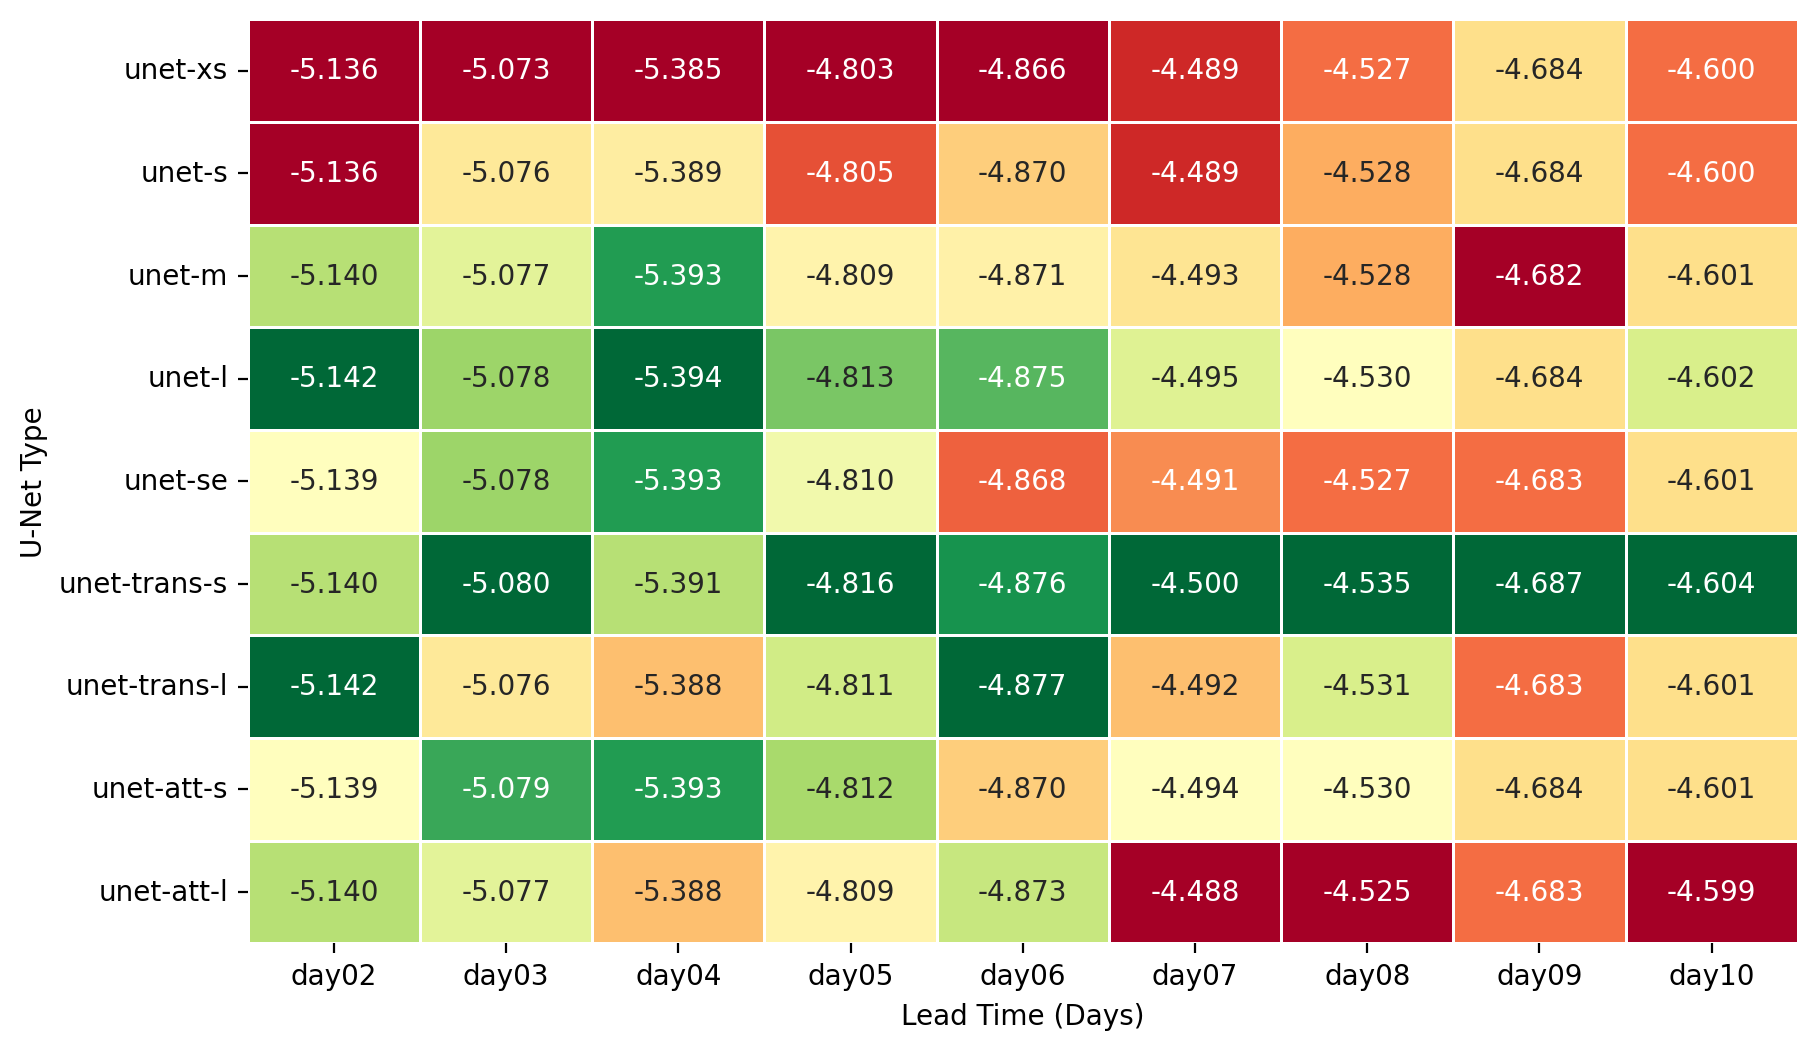

In [54]:
import os
import pandas as pd
import numpy as np

# Define the path to the CSV files
path_to_csv = os.path.join(PPROJECT_DIR2, "HPT")
all_files = [file for file in os.listdir(path_to_csv) if file.endswith('.csv')]
days = [f"day{str(i).zfill(2)}.csv" for i in range(2, 11)]

# Define the U-Net types in the desired order
unet_types = ["unet-xs", "unet-s", "unet-m", "unet-l", "unet-se", 
              "unet-trans-s", "unet-trans-l", "unet-att-s", "unet-att-l"]

# Initialize a dictionary to store the minimum val_loss for each (unet_type, day) combination
results = {unet: {day: np.nan for day in days} for unet in unet_types}

# Loop through each day and find the minimum val_loss per U-Net type
for day in days:
    filtered_files = [file for file in all_files if file.endswith(day)]
    
    # Dictionary to store the minimum val_loss per U-Net type for this day
    min_losses = {unet: np.inf for unet in unet_types}

    for file in filtered_files:
        file_path = os.path.join(path_to_csv, file)
        
        # Extract U-Net type from the filename
        parts = file.split('_')
        unet_type = str(parts[11])
        
        if unet_type in unet_types:  # Only process defined U-Net types
            df = pd.read_csv(file_path)
            
            # Get the minimum validation loss
            min_val_loss = np.round(np.log10(df["val_loss"].min()), 3)

            # Store the minimum val_loss for this U-Net type
            min_losses[unet_type] = min(min_losses[unet_type], min_val_loss)

    # Store results in the dictionary
    for unet_type in unet_types:
        results[unet_type][day] = min_losses[unet_type] if min_losses[unet_type] != np.inf else np.nan

# Convert the results dictionary to a DataFrame
df_min_val_loss = pd.DataFrame(results).T  # Transpose to get the correct format
df_min_val_loss.columns = [f"day{str(i).zfill(2)}" for i in range(2, 11)]  # Rename columns

# Save the DataFrame to a CSV file
df_min_val_loss.to_csv("min_val_loss_per_unet_per_day.csv")

# Display the DataFrame
df_min_val_loss

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("min_val_loss_per_unet_per_day.csv", index_col=0)

# Normalize each column individually (column-wise normalization)
df_normalized = df.copy()
for col in df.columns:
    df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Plot the heatmap
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(df_normalized, cmap="RdYlGn_r", annot=df, fmt=".3f", linewidths=0.5, cbar=False)

#plt.title("Validation Loss Heatmap (Lower is Better)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("U-Net Type")
plt.show()


### 1.2. Optimum HPT results

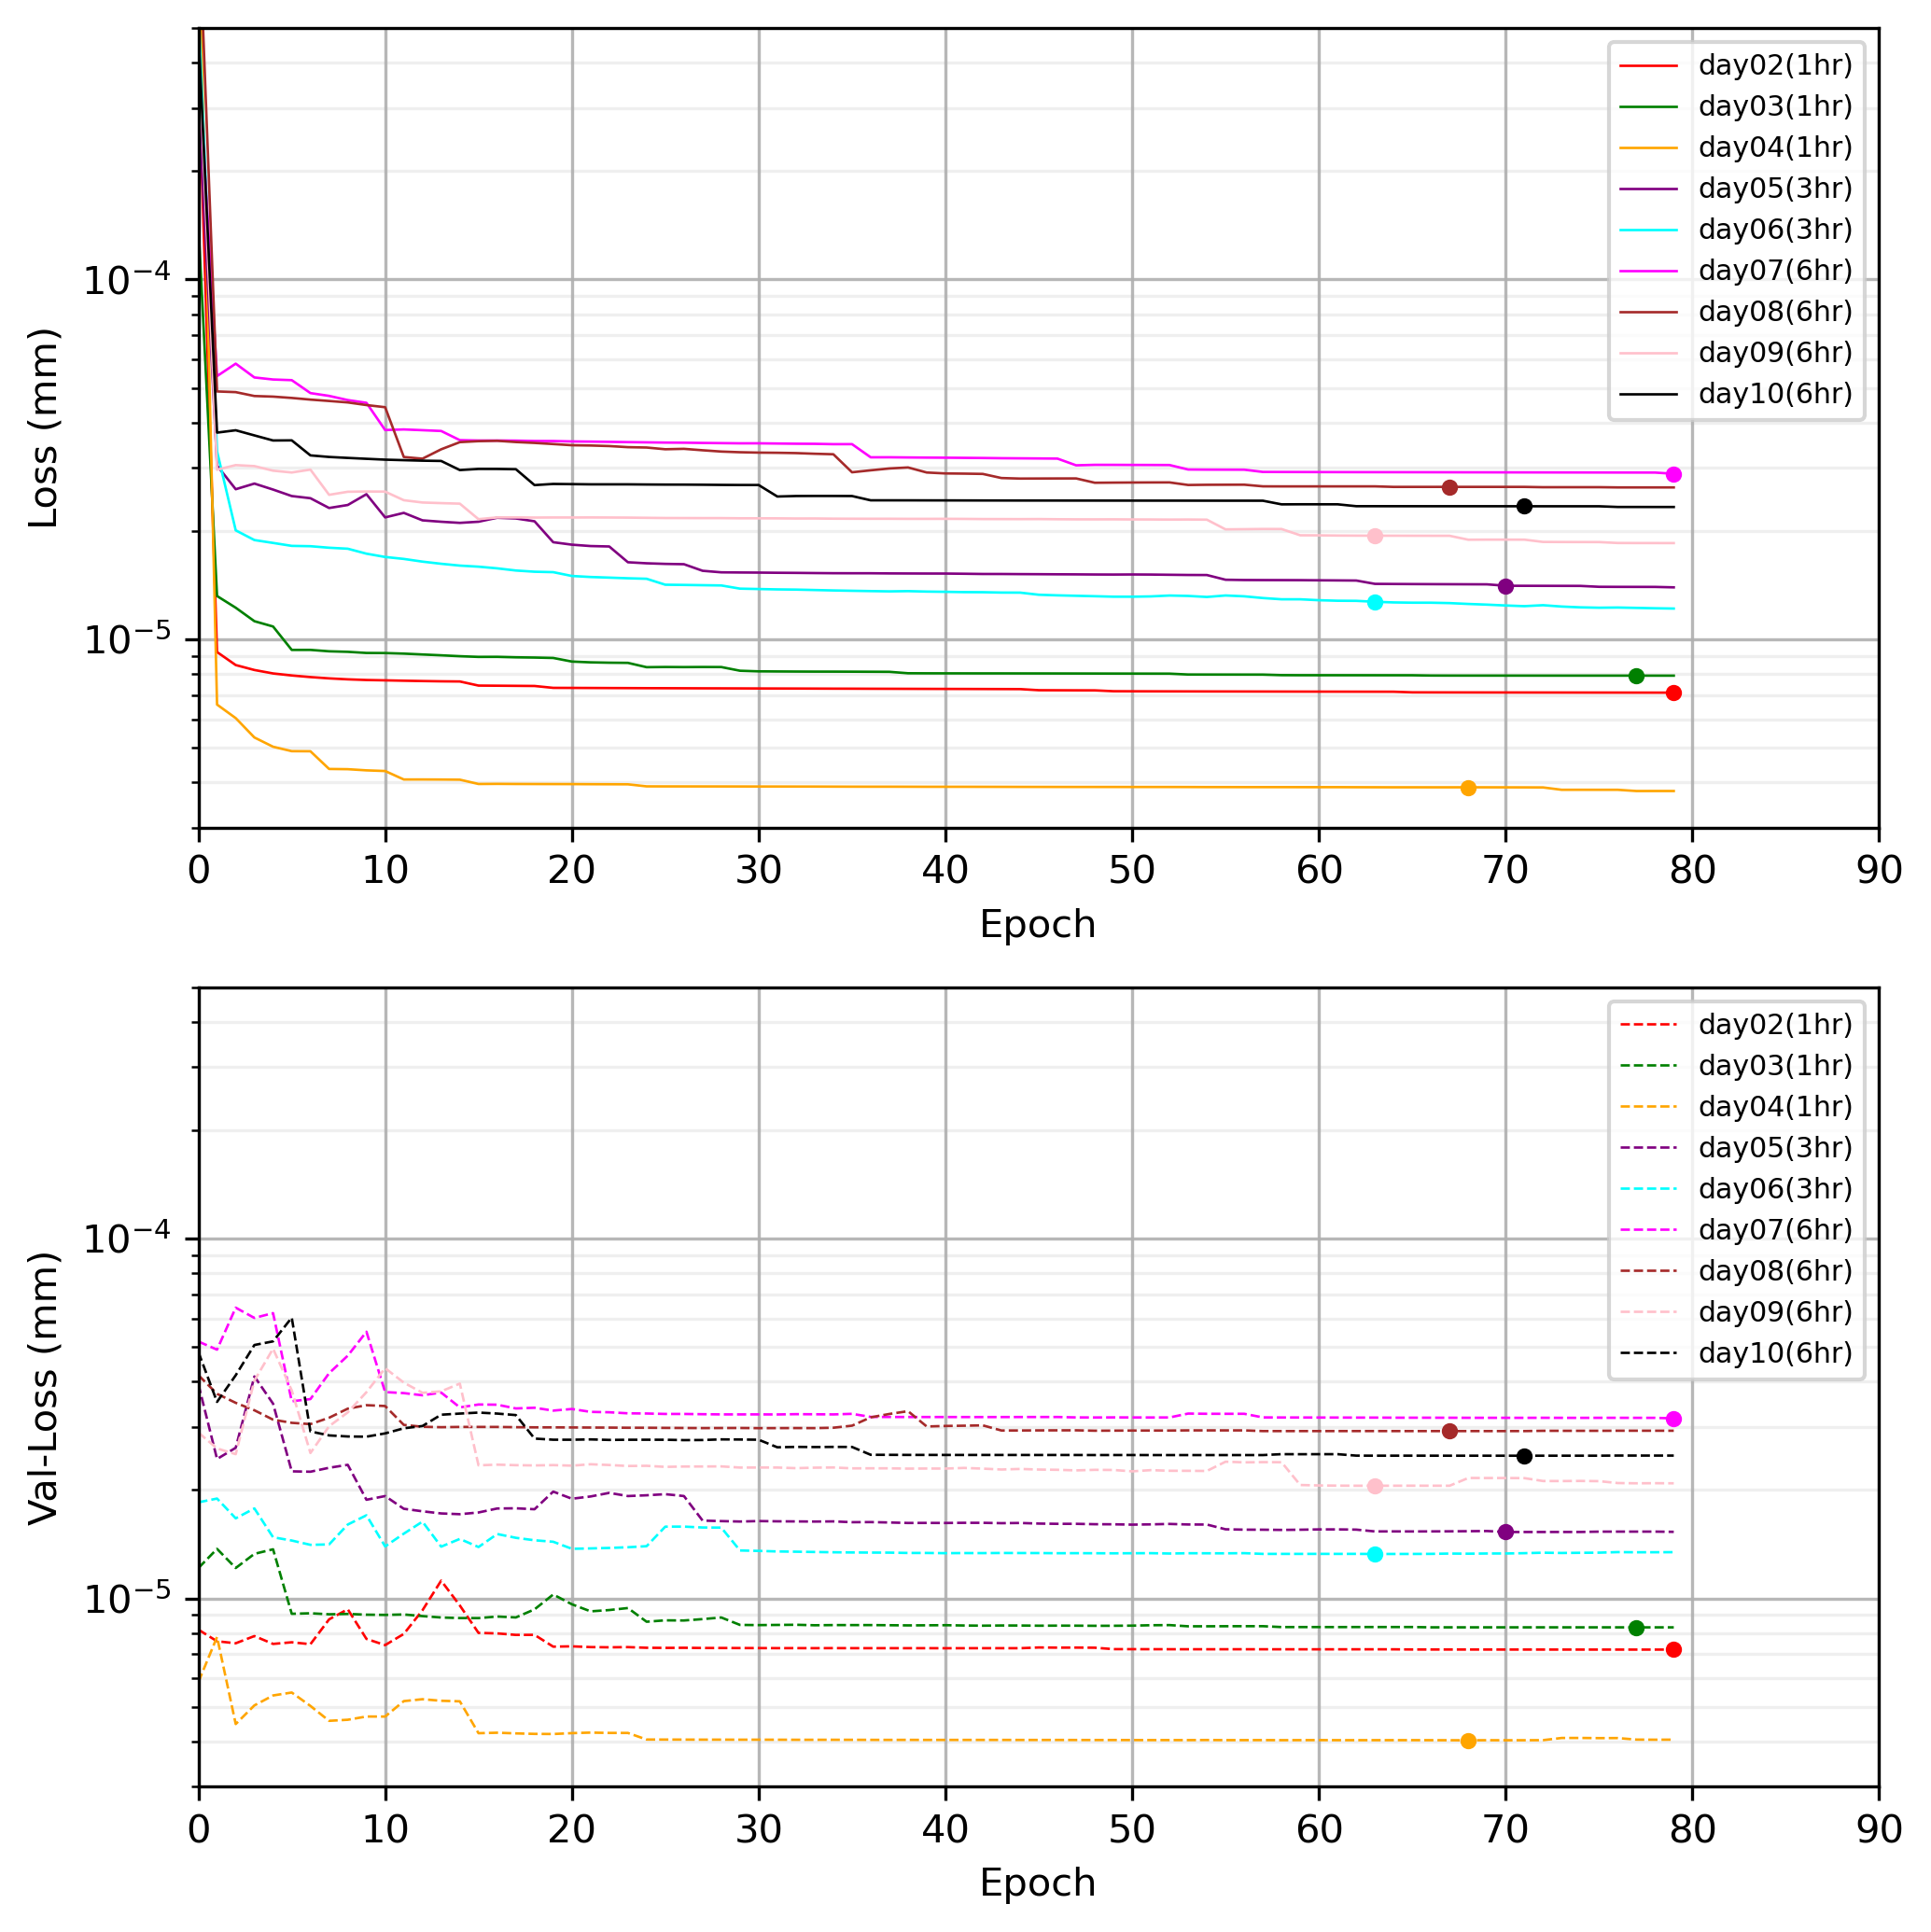

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt

fsc=0.9
lwc=0.8
dropout=0.0
# Path to directory containing csv files
path_to_csv = os.path.join(PPROJECT_DIR2, 'HPT/')

# Read the best hyperparameters
best_params_df = pd.read_csv('best_hyperparameters.csv', index_col=0)

# Define colors list
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'black']

# Create dictionaries to map days to colors and units
day_colors = {
    '02': colors[1],
    '03': colors[2],
    '04': colors[3],
    '05': colors[4],
    '06': colors[5],
    '07': colors[6],
    '08': colors[7],
    '09': colors[8],
    '10': colors[9]
}

unit_labels = {
    '02': '1hr',
    '03': '1hr',
    '04': '1hr',
    '05': '3hr',
    '06': '3hr',
    '07': '6hr',
    '08': '6hr',
    '09': '6hr',
    '10': '6hr'
}

# Create subplots for loss and val_loss
fig, axs = plt.subplots(2, 1, figsize=(7, 7), dpi=300)

# Iterate over each day and plot the optimum csv file
for day in best_params_df.index:
    # Get the best hyperparameters for the day
    best_params = best_params_df.loc[day]
    lr = best_params['lr']
    bs = best_params['bs']
    unet_type = best_params['unet_type']

    # Construct the file pattern based on the provided pattern
    file_pattern = f"mse_64_{lr}_1e-11_0.5_4_{int(bs)}_16_0.5_80_{dropout}_{unet_type}_{day}"
    
    # Find the corresponding file
    matching_files = [file for file in os.listdir(path_to_csv) if file == file_pattern]

    # There should be only one matching file for the best hyperparameters
    if matching_files:
        filename = matching_files[0]
        # Read csv file
        df = pd.read_csv(os.path.join(path_to_csv, filename))
        # Plot loss
        dayind=day[-6:-4]
        axs[0].plot(df['loss'], color=day_colors[dayind], label='day{}({})'.format(dayind, unit_labels[dayind]), linewidth=0.8*lwc)
        # Plot val_loss
        axs[1].plot(df['val_loss'], linestyle='--', color=day_colors[dayind], label='day{}({})'.format(dayind, unit_labels[dayind]), linewidth=0.8*lwc)
        # Find index of minimum val_loss for the day
        min_val_loss_index = df['val_loss'].idxmin()
        # Plot point at the minimum val_loss index
        axs[0].scatter(min_val_loss_index, df['loss'][min_val_loss_index], color=day_colors[dayind], marker='o', s=10, zorder=10)
        axs[1].scatter(min_val_loss_index, df['val_loss'][min_val_loss_index], color=day_colors[dayind], marker='o', s=10, zorder=10)

# Set y-axis to logarithmic scale
axs[0].set_yscale('log')
axs[1].set_yscale('log')

# Add grids to both subplots
axs[0].grid(True, alpha=0.2, which='minor')
axs[1].grid(True, alpha=0.2, which='minor')
axs[0].grid(True, alpha=0.9, which='major')
axs[1].grid(True, alpha=0.9, which='major')

axs[0].set_ylim(0.000003, 0.0005)
axs[1].set_ylim(0.000003, 0.0005)
axs[0].set_xlim(0, 90)
axs[1].set_xlim(0, 90)

# Add labels and legends to the subplots
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss (mm)')
axs[0].legend(loc="upper right", fontsize=8*fsc)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Val-Loss (mm)')
axs[1].legend(loc="upper right", fontsize=8*fsc)

# Adjust layout
plt.tight_layout()

# Save figure with white background
plt.savefig(DUMP_PLOT+'/training_results.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.show()

## 2. Forecast error correction results

In [57]:
# Define the error metrics, temporal resolutions, and seasons
from matplotlib.colors import LinearSegmentedColormap

# Define the plot ranges, units, and colormaps for each error metric and temporal resolution
plot_ranges = {
    ("ME", "hourly"): (-0.4, 0.4),
    ("ME", "daily"): (-3, 3),
    ("ME", "monthly"): (-100, 100),
    ("RMSE", "hourly"): (0, 2),
    ("RMSE", "daily"): (0, 6),
    ("RMSE", "monthly"): (0, 100),
    ("COR", "hourly"): (0, 1),
    ("COR", "daily"): (0, 1),
    ("COR", "monthly"): (0, 1),
}

units = {
    ("ME", "hourly"): "mm/hr",
    ("ME", "daily"): "mm/day",
    ("ME", "monthly"): "mm/month",
    ("RMSE", "hourly"): "mm/hr",
    ("RMSE", "daily"): "mm/day",
    ("RMSE", "monthly"): "mm/month",
    ("COR", "hourly"): "Hourly",
    ("COR", "daily"): "Daily",
    ("COR", "monthly"): "Monthly",
}

colormaps = {
    ("ME", "hourly"): plt.get_cmap("coolwarm", 8),
    ("ME", "daily"): plt.get_cmap("coolwarm", 8),
    ("ME", "monthly"): plt.get_cmap("coolwarm", 10),
    ("RMSE", "hourly"): plt.get_cmap("rainbow", 10),
    ("RMSE", "daily"): plt.get_cmap("rainbow", 12),
    ("RMSE", "monthly"): plt.get_cmap("rainbow", 10),
    ("COR", "hourly"): plt.get_cmap("rainbow", 10),
    ("COR", "daily"): plt.get_cmap("rainbow", 10),
    ("COR", "monthly"): plt.get_cmap("rainbow", 10),
}


# Define the plot ranges, units, and colormaps for each error metric and temporal resolution for improvement plots
min_i=-100
max_i=100
plot_ranges_i = {
    ("ME", "hourly"): (min_i, max_i),
    ("ME", "daily"): (-100, 100),
    ("ME", "monthly"): (min_i, max_i),
    ("RMSE", "hourly"): (-20, 20),
    ("RMSE", "daily"): (min_i, max_i),
    ("RMSE", "monthly"): (min_i, max_i),
    ("COR", "hourly"): (min_i, max_i),
    ("COR", "daily"): (-100, 100),
    ("COR", "monthly"): (min_i, max_i),
}

units_i = {
    ("ME", "hourly"): "Improvement (%)",
    ("ME", "daily"): "Improvement (%)",
    ("ME", "monthly"): "Improvement (%)",
    ("RMSE", "hourly"): "Improvement (%)",
    ("RMSE", "daily"): "Improvement (%)",
    ("RMSE", "monthly"): "Improvement (%)",
    ("COR", "hourly"): "Improvement (%)",
    ("COR", "daily"): "Improvement (%)",
    ("COR", "monthly"): "Improvement (%)",
}

RGmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=16) 

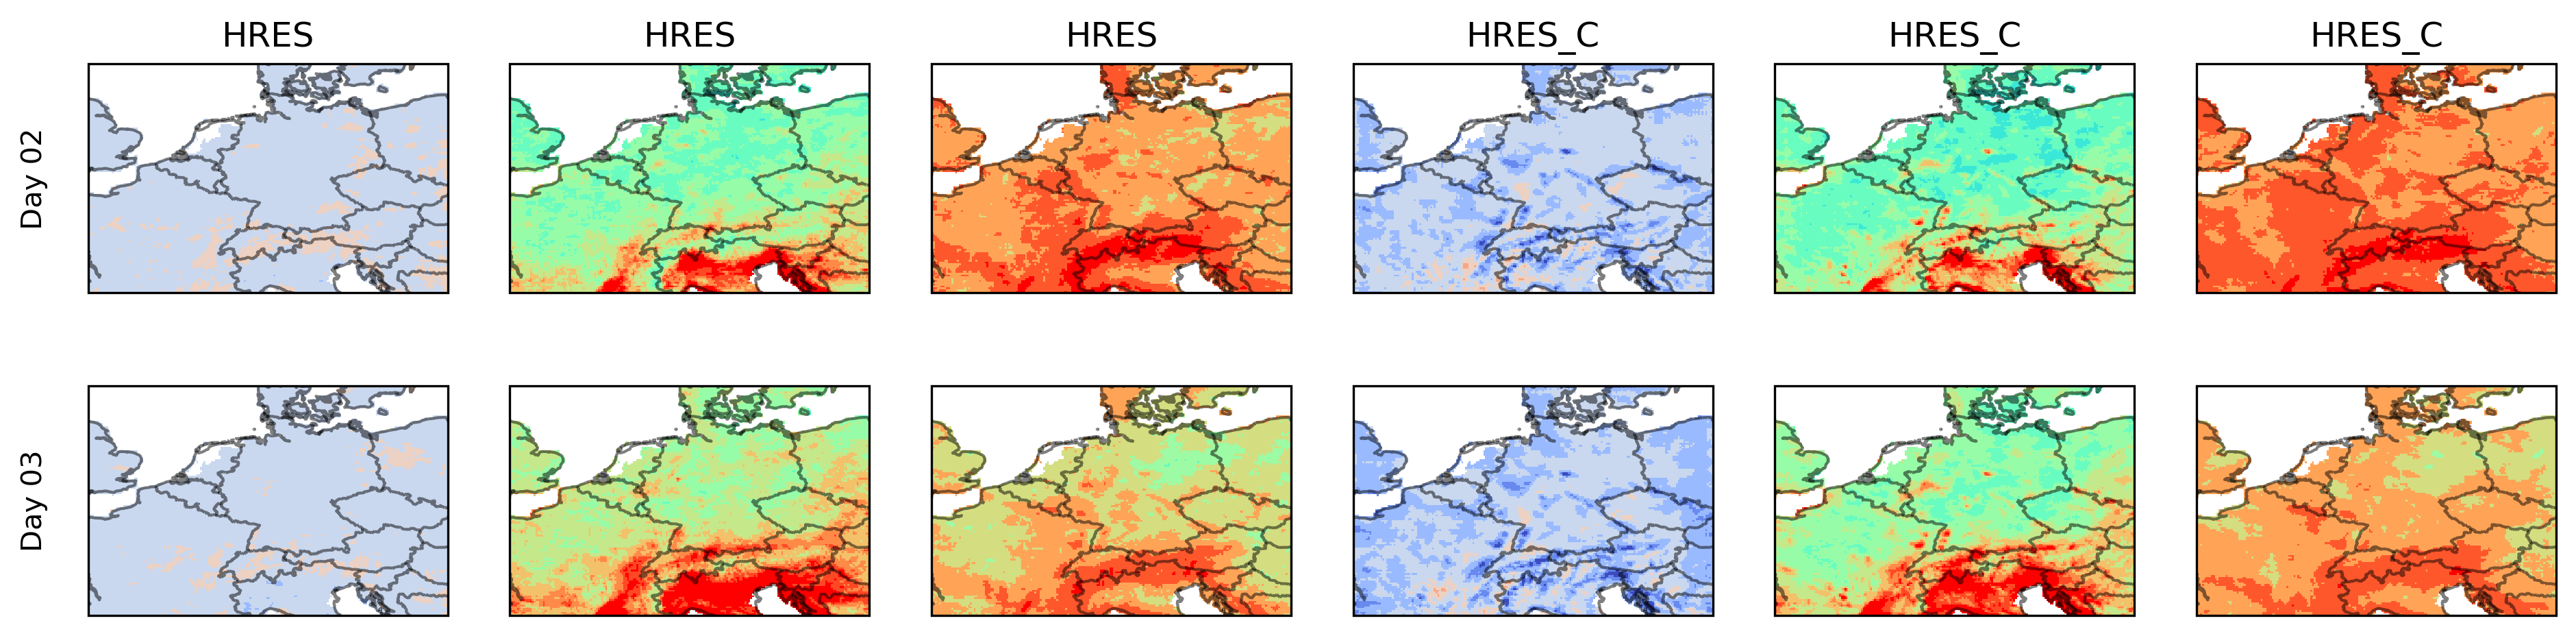

<Figure size 640x480 with 0 Axes>

in these results we have overlooked the daily values lower than 0.01mm/day


In [59]:
import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

# Load the land mask
altitude_data = np.load("/p/project1/cesmtst/patakchiyousefi1/KISTE_PROJECT/IO/03-TOPOGRAPHY/HSAF-TOPO.npz")
altitude = altitude_data["arr_0"][..., 2]
land_mask = (altitude > 0).astype(np.float32)
land_mask[land_mask != 1] = np.nan

# Figure settings
fs = 1  # Scale for resizing the figure

lead_times = [f"{day:02d}" for day in range(2, 11)]
metric_labels = ['Mean Error', 'Root Mean Squared Error', 'Correlation Coefficient']
metrics_short = ['ME', 'RMSE', 'COR']
product_labels = ['HRES', 'HRES_C']
temporal_resolution = "daily"

# Define figure and axes using GridSpec
fig = plt.figure(figsize=(16 * fs, 18 * fs), dpi=300)
gs = gridspec.GridSpec(len(lead_times), len(metric_labels) * len(product_labels) + 1, width_ratios=[1] * (len(metric_labels) * len(product_labels)) + [0.05])

for i, lead_time in enumerate(lead_times[:2]):
    for j, product in enumerate(product_labels):
        for mm in range(3):  # Metrics
            metric_short = metrics_short[mm]
            metric = metric_labels[mm]
            
            # Read the data
            file_path = STATS + "/ADAPTER_DE05.day" + lead_time + "_" + product + "_stats.nc"
            if os.path.exists(file_path):
                data = xr.open_dataset(file_path)
                metric_data = data[metric].values
            
                # Plot the data as map
                latitudes = data["latitude"].values
                longitudes = data["longitude"].values
                plot_range = plot_ranges[(metrics_short[mm], temporal_resolution)]
                unit = units[(metrics_short[mm], temporal_resolution)]
                cmap = colormaps[(metrics_short[mm], temporal_resolution)]
                
                ax = plt.subplot(gs[i, j * len(metric_labels) + mm], projection=ccrs.PlateCarree())
                
                ax.coastlines(resolution='auto', linestyle='-', alpha=0.5)  # Increase border line detail
                ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)  # Increase country border line detail
                im = ax.pcolormesh(longitudes, latitudes, metric_data*land_mask, cmap=cmap, vmin=plot_range[0], vmax=plot_range[1], transform=ccrs.PlateCarree())

            else:
                print(file_path + " does not exist!")
                
            if i == len(lead_times) - 1:  # Check if it's the last day
                # Add colorbar for the last day (day 10) to each ax individually
                cbar = plt.colorbar(im, ax=ax, orientation='horizontal', aspect=30, pad=0.05)
                cbar.set_label(f'{metric_short}({unit})')
            
            if i == 0:
                ax.set_title(f'{product}')
                
            if product == 'HRES' and metric_short == 'ME':
                ax.text(-0.15, 0.5, f'Day {lead_time}', rotation=90, va='center', ha='center', transform=ax.transAxes)            
            data.close()

# Show plot
plt.show()
plt.savefig(DUMP_PLOT+'/errors.png', dpi=300, facecolor='white')
plt.show()

print("in these results we have overlooked the daily values lower than 0.01mm/day")

Files for lead time 04 do not exist!
Files for lead time 04 do not exist!
Files for lead time 04 do not exist!
Files for lead time 05 do not exist!
Files for lead time 05 do not exist!
Files for lead time 05 do not exist!
Files for lead time 06 do not exist!
Files for lead time 06 do not exist!
Files for lead time 06 do not exist!
Files for lead time 07 do not exist!
Files for lead time 07 do not exist!
Files for lead time 07 do not exist!
Files for lead time 08 do not exist!
Files for lead time 08 do not exist!
Files for lead time 08 do not exist!
Files for lead time 09 do not exist!
Files for lead time 09 do not exist!
Files for lead time 09 do not exist!
Files for lead time 10 do not exist!
Files for lead time 10 do not exist!
Files for lead time 10 do not exist!


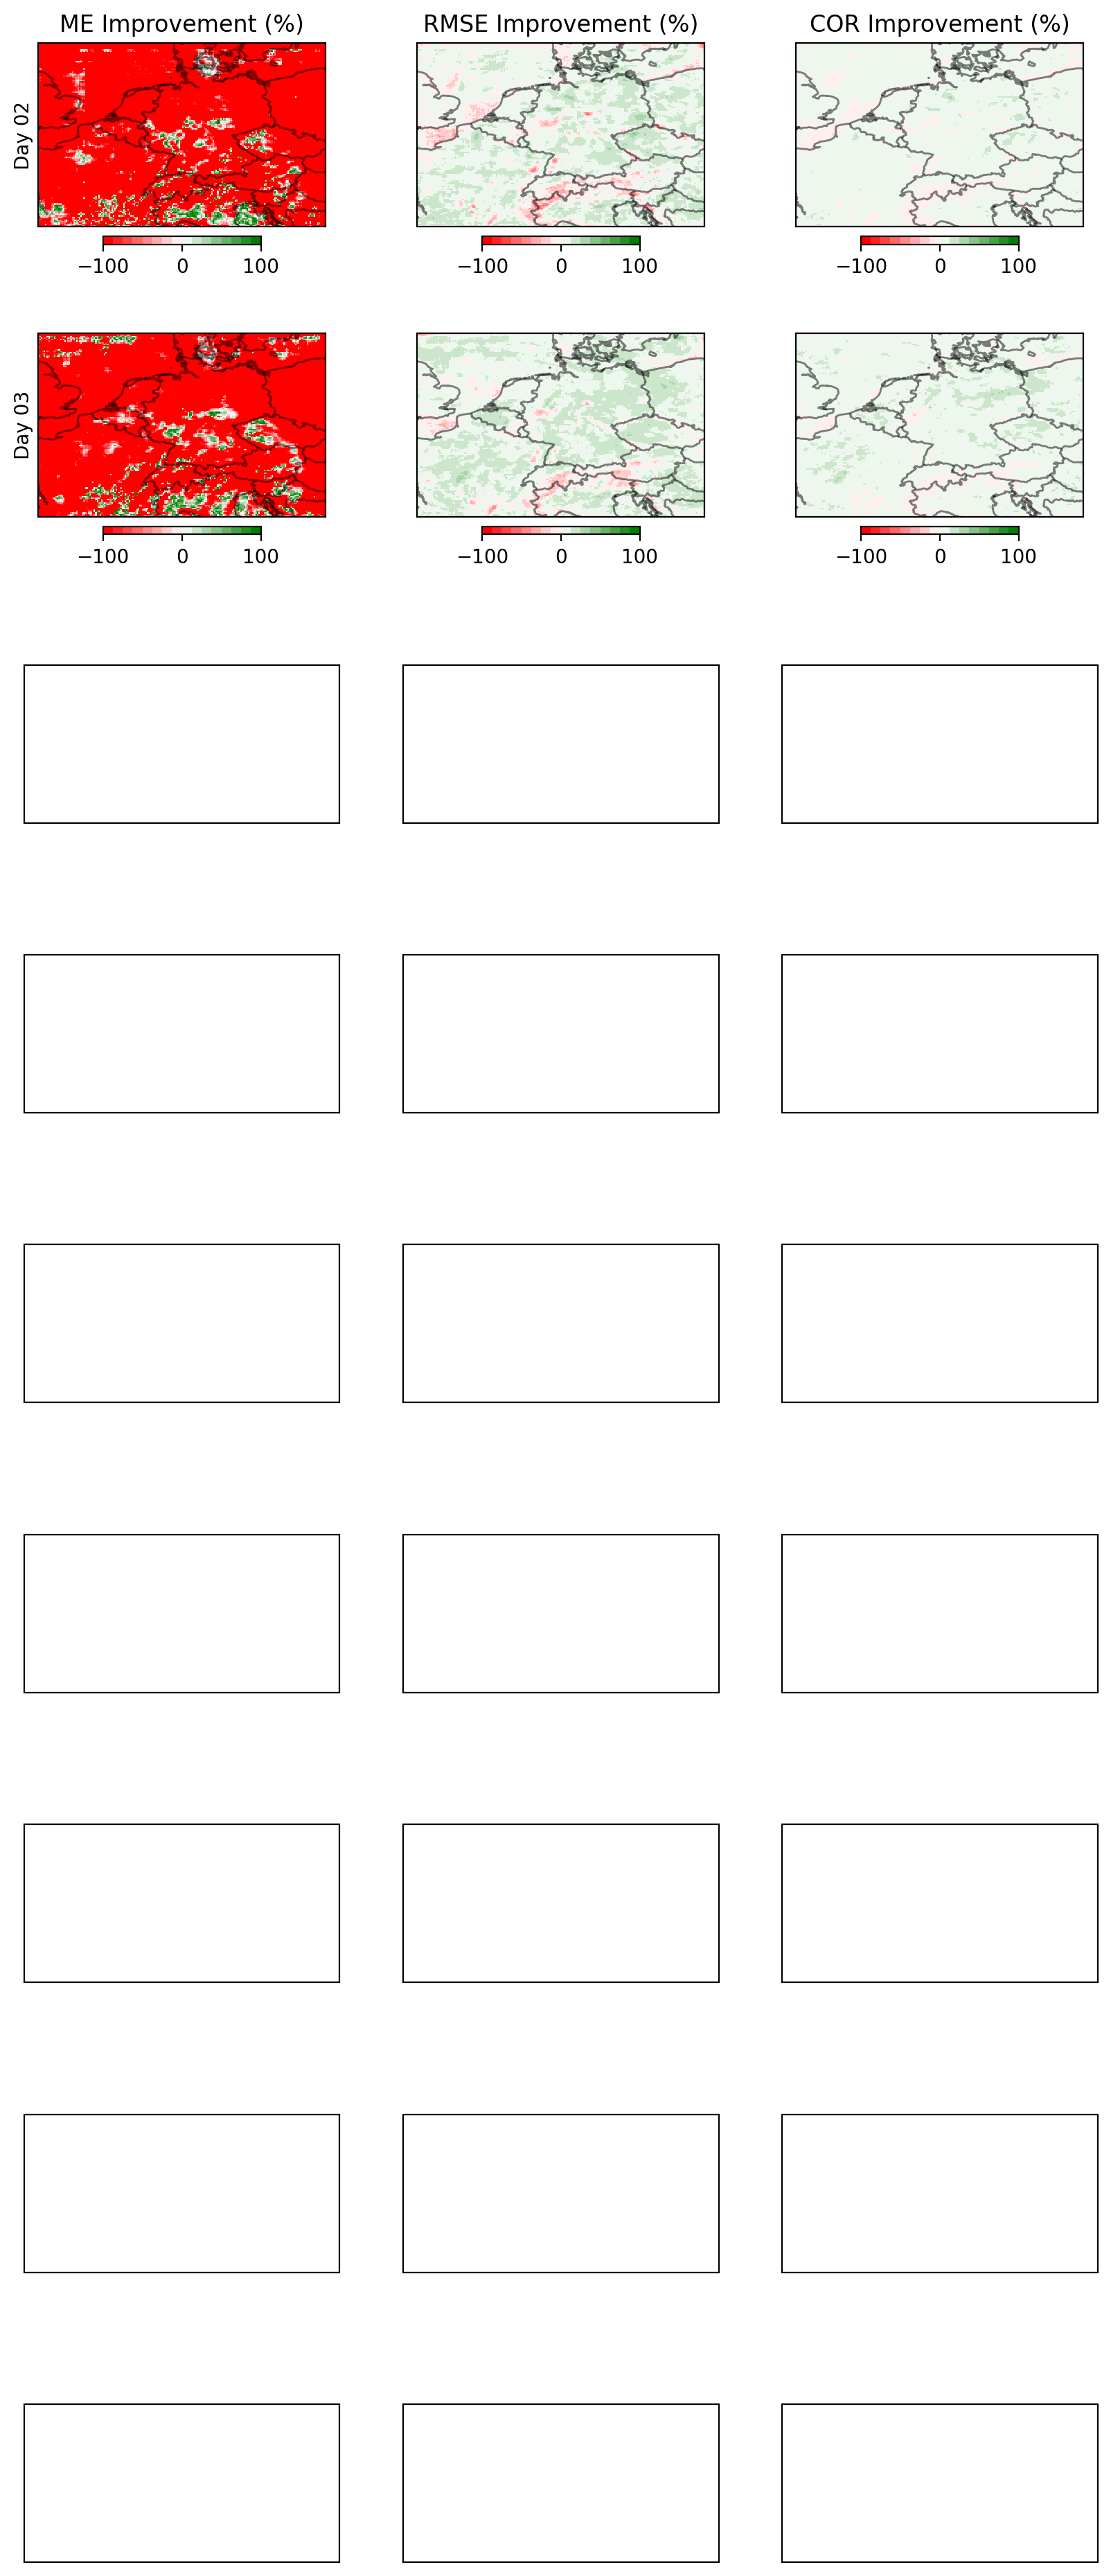

In [60]:
import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the land mask
altitude_data = np.load("/p/project1/cesmtst/patakchiyousefi1/KISTE_PROJECT/IO/03-TOPOGRAPHY/HSAF-TOPO.npz")
altitude = altitude_data["arr_0"][..., 2]
land_mask = (altitude > 0).astype(np.float32)
land_mask[land_mask != 1] = 1

# Figure settings
fs = 2  # Scale for resizing the figure

lead_times = [f"{day:02d}" for day in range(2, 11)]
metric_labels = ['Mean Error', 'Root Mean Squared Error', 'Correlation Coefficient']
metrics_short = ['ME', 'RMSE', 'COR']
temporal_resolution = "daily"

# Define figure and axes
fig, axs = plt.subplots(len(lead_times), len(metric_labels), figsize=(5 * fs, 12 * fs),
                        subplot_kw={'projection': ccrs.PlateCarree()}, dpi=200)

for i, lead_time in enumerate(lead_times[:]):
    for mm in range(3):  # Metrics
        metric_short = metrics_short[mm]
        metric = metric_labels[mm]
        
        # File paths for HRES and HRES-C
        file_path_hres = f"{STATS}/ADAPTER_DE05.day{lead_time}_HRES_stats.nc"
        file_path_hres_c = f"{STATS}/ADAPTER_DE05.day{lead_time}_HRES_C_stats.nc"
        
        if os.path.exists(file_path_hres) and os.path.exists(file_path_hres_c):
            data_hres = xr.open_dataset(file_path_hres)
            data_hres_c = xr.open_dataset(file_path_hres_c)
            
            metric_data_hres = data_hres[metric].values
            metric_data_hres_c = data_hres_c[metric].values
            
            if metric_short in ['ME', 'RMSE']:
                # Calculate percentage reduction
                mask = np.abs(metric_data_hres) >= 0.0001  # Avoid division by zero and handle small values
                improvement = np.zeros_like(metric_data_hres)
                improvement[mask] = -100 * (np.abs(metric_data_hres_c[mask]) - np.abs(metric_data_hres[mask])) / np.abs(metric_data_hres[mask])
            else:  # COR
                # Calculate percentage improvement
                improvement = 100 * (metric_data_hres_c - metric_data_hres) / np.abs(metric_data_hres)
            
            # Apply land mask
            improvement *= land_mask
            
            latitudes = data_hres["latitude"].values
            longitudes = data_hres["longitude"].values
            plot_range = plot_ranges_i[(metric_short, "daily")]
            cmap = RGmap
            
            ax = axs[i, mm]
            ax.coastlines(resolution='auto', linestyle='-', alpha=0.5)
            ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
            im = ax.pcolormesh(longitudes, latitudes, improvement, cmap=cmap, vmin=plot_range[0], vmax=plot_range[1], transform=ccrs.PlateCarree())
            plt.colorbar(im, orientation='horizontal', fraction=0.2, pad=0.04, shrink=0.5)
            
            if i == 0:
                ax.set_title(f'{metric_short} Improvement (%)')
                
            if metric_short == 'ME':
                ax.text(-0.05, 0.5, f'Day {lead_time}', rotation=90, va='center', ha='center', transform=ax.transAxes)
                
            data_hres.close()
            data_hres_c.close()
        else:
            print(f"Files for lead time {lead_time} do not exist!")

# Add colorbar
#cbar = fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04, shrink=0.5)
#cbar.set_label('Improvement (%)')

# Show plot
plt.show()


## 3. Time-series and average maps

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
lead_time = "10"
start_date = '2020-04-01'
end_date = '2020-06-28'

file_path_hres = f"{HRES_PREP}/ADAPTER_DE05.day{lead_time}.merged.nc"
file_path_hres_c = f"{PREDICT_FILES}/ADAPTER_DE05.day{lead_time}.merged.nc.corrected.nc"
file_path_ref = f"{HRES_PREP}/ADAPTER_DE05.day01.merged.nc"

data_hres = xr.open_dataset(file_path_hres)
data_hres_c = xr.open_dataset(file_path_hres_c)
data_ref = xr.open_dataset(file_path_ref)

# Select data for the year 2018
data_hres = data_hres.sel(time=slice(start_date, end_date))
data_hres_c = data_hres_c.sel(time=slice(start_date, end_date))
data_ref = data_ref.sel(time=slice(start_date, end_date))

# Align datasets according to reference
data_hres, data_hres_c, data_ref = xr.align(data_hres, data_hres_c, data_ref, join='inner')

# Resample datasets to daily frequency
#data_hres_daily = data_hres.resample(time='D').sum()
#data_hres_c_daily = data_hres_c.resample(time='D').sum()
#data_ref_daily = data_ref.resample(time='D').sum()

# Select a random point
#np.random.seed(250)  # For reproducibility
#latitudes = data_hres_daily.latitude.values
#longitudes = data_hres_daily.longitude.values

latitudes = data_hres.latitude.values
longitudes = data_hres.longitude.values

random_lat = np.random.choice(latitudes)
random_lon = np.random.choice(longitudes)

random_lat = 50
random_lon = 20

time_series_hres = data_hres.sel(latitude=random_lat, longitude=random_lon, method="nearest")
time_series_hres_c = data_hres_c.sel(latitude=random_lat, longitude=random_lon, method="nearest")
time_series_ref = data_ref.sel(latitude=random_lat, longitude=random_lon, method="nearest")

# Plot the time series
plt.figure(figsize=(14, 6), dpi=250)
plt.plot(time_series_hres.time, time_series_hres.pr-time_series_ref.pr, label='HRES_MISMATCH')
plt.plot(time_series_hres_c.time, time_series_hres.pr-time_series_hres_c.pr, label='HRES_C_MISMATCH')
plt.title(f'Time Series at (lat: {np.round(random_lat, 2)}, lon: {np.round(random_lon, 2)})')
plt.xlabel('Time')
plt.ylabel('Mismatch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6), dpi=250)
plt.plot(time_series_hres.time, time_series_hres.pr, label='HRES')
plt.plot(time_series_ref.time, time_series_ref.pr, label='REF')
plt.plot(time_series_hres_c.time, time_series_hres_c.pr, label='HRES-C')

plt.title(f'Time Series at (lat: {np.round(random_lat, 2)}, lon: {np.round(random_lon, 2)})')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Close datasets
data_hres.close()
data_hres_c.close()
data_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/p/scratch/cesmtst/patakchiyousefi1/FORECASTLEAD_CESMTST_SCRATCH/PREDICT_FILES/ADAPTER_DE05.day10.merged.nc.corrected.nc'

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Define constants
lead_time = "03"
start_date = '2018-01-01'
end_date = '2018-12-31'
file_paths = {
    'HRES': f"{HRES_PREP}/ADAPTER_DE05.day{lead_time}.merged.nc",
    'HRES_C': f"{PREDICT_FILES}/ADAPTER_DE05.day{lead_time}.merged.nc.corrected.nc",
    'Reference': f"{HRES_PREP}/ADAPTER_DE05.day01.merged.nc"
}

# Load and select data
datasets = {name: xr.open_dataset(path).sel(time=slice(start_date, end_date)) for name, path in file_paths.items()}
datasets = xr.align(*datasets.values(), join='inner')

# Compute statistics
avg_precip = {name: ds.pr.mean(dim='time') for name, ds in zip(file_paths.keys(), datasets)}
max_precip = {name: ds.pr.max(dim='time') for name, ds in zip(file_paths.keys(), datasets)}
min_precip = {name: ds.pr.min(dim='time') for name, ds in zip(file_paths.keys(), datasets)}

# Plot data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Plot average, maximum, and minimum precipitation
for i, (name, avg, max_p, min_p) in enumerate(zip(file_paths.keys(), avg_precip.values(), max_precip.values(), min_precip.values())):
    # Average Precipitation
    im1 = axes[0, i].pcolormesh(avg.longitude, avg.latitude, avg, cmap='viridis')
    axes[0, i].set_title(f'Average Precipitation ({name})')
    fig.colorbar(im1, ax=axes[0, i], orientation='vertical', label='Precipitation')

    # Maximum Precipitation
    im2 = axes[1, i].pcolormesh(max_p.longitude, max_p.latitude, max_p, cmap='viridis')
    axes[1, i].set_title(f'Maximum Precipitation ({name})')
    fig.colorbar(im2, ax=axes[1, i], orientation='vertical', label='Precipitation')

    # Minimum Precipitation
    im3 = axes[2, i].pcolormesh(min_p.longitude, min_p.latitude, min_p, cmap='viridis')
    axes[2, i].set_title(f'Minimum Precipitation ({name})')
    fig.colorbar(im3, ax=axes[2, i], orientation='vertical', label='Precipitation')

plt.tight_layout()
plt.show()

# Close datasets
for ds in datasets:
    ds.close()


## 4. Visualize the attention feature maps:

In [15]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from func_train import *
from keras import backend as K

# Clear any existing Keras session to start with a clean slate
K.clear_session()

# Define the path to the CSV files and best_hyperparameters.csv
path_to_csv = os.path.join(PPROJECT_DIR2, "HPT")
best_hyperparams_path = 'best_hyperparameters.csv'

# Read the best_hyperparameters.csv file
best_params_df = pd.read_csv(best_hyperparams_path, index_col=0)

# Function to formulate the model filename based on hyperparameters
def get_model_filename(day, dropout, lr, bs):
    return f"mse_64_{lr}_1e-17_0.5_4_{bs}_16_0.5_128_{dropout}_{day}.h5"

# Function to plot and save feature maps for a model and a given layer
def plot_and_save_feature_maps(model, layer_name, day, num_images=6, save_dir=DUMP_PLOT):
    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    # Extract the intermediate layer model
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    
    # Generate a random input sample
    input_sample = tf.ones([1, n_lat, n_lon, n_channels])*1
    
    # Get the feature maps
    feature_maps = intermediate_layer_model.predict(input_sample)
    
    # Plot the feature maps
    square = int(tf.math.sqrt(float(num_images)))
    fig, axes = plt.subplots(square, square, figsize=(9, 5), dpi=300)
    
    for i in range(num_images):
        ax = axes[i // square, i % square]
        ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(save_dir, f"{day}_{layer_name}_feature_maps.png"))
    plt.close()

# Loop through all days in best_params_df
for day, params in best_params_df.iterrows():
    K.clear_session()
    dropout = params['dropout']
    lr = params['lr']
    bs = int(params['bs'])
    
    # Extract the day without the '.csv' extension
    day = day.replace('.csv', '')
    
    # Formulate the model filename
    model_filename = get_model_filename(day, dropout, lr, bs)
    model_path = os.path.join(path_to_csv, model_filename)
    
    # Load the model
    if os.path.exists(model_path):
        best_model = load_model(model_path)
        print(f"Loaded model for {day} from {model_path}")
        
        # Define the model parameters
        n_lat = 128  # Number of latitude pixels
        n_lon = 256  # Number of longitude pixels
        n_channels = 7  # Number of channels
        ifn = 64  # Initial filter number
        dropout_rate = dropout
        
        # Create the UNET_ATT model
        model = UNET(n_lat, n_lon, n_channels, ifn, dropout_rate)
        
        # Load the weights from the pre-trained model
        model.set_weights(best_model.get_weights())
        
        # Plot and save feature maps for 'multiply_8' layer (adjust as needed)
        plot_and_save_feature_maps(model, 'conv2d_9', day, num_images=16)
        
    else:
        print(f"Model file {model_filename} not found for {day}")


Model file mse_64_0.001_1e-17_0.5_4_2_16_0.5_128_0.0_day02.h5 not found for day02
Model file mse_64_0.001_1e-17_0.5_4_2_16_0.5_128_0.0_day03.h5 not found for day03
Model file mse_64_0.01_1e-17_0.5_4_2_16_0.5_128_0.0_day04.h5 not found for day04
Model file mse_64_0.001_1e-17_0.5_4_1_16_0.5_128_0.0_day05.h5 not found for day05
Model file mse_64_0.0001_1e-17_0.5_4_4_16_0.5_128_0.0_day06.h5 not found for day06
Model file mse_64_0.0001_1e-17_0.5_4_2_16_0.5_128_0.0_day07.h5 not found for day07
Model file mse_64_1e-05_1e-17_0.5_4_1_16_0.5_128_0.0_day08.h5 not found for day08
Model file mse_64_0.0001_1e-17_0.5_4_4_16_0.5_128_0.0_day09.h5 not found for day09
Model file mse_64_1e-05_1e-17_0.5_4_1_16_0.5_128_0.0_day10.h5 not found for day10


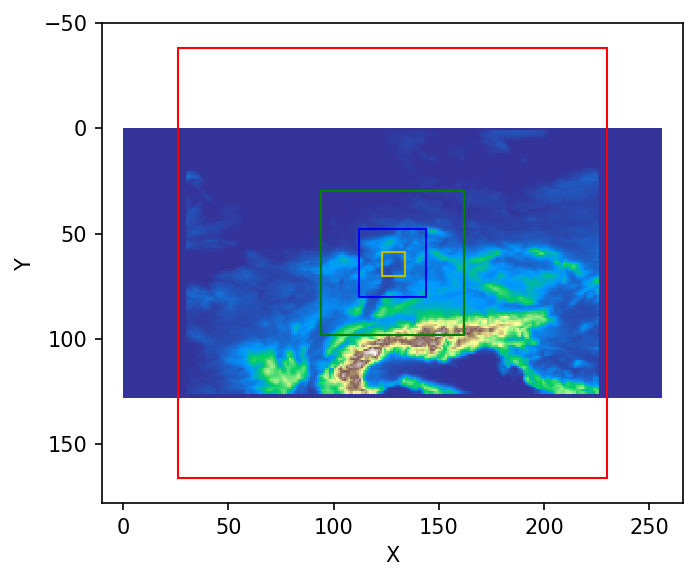

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

produce_files = np.load(PRODUCE_FILES + "/produce_for_train_data_hourly_pr_['ADAPTER_DE05.day04.merged.nc']_['ADAPTER_DE05.day01.merged.nc']_MM_6__spatiotemporal_128.256_2018-01-01T13_2022-12-31T23_no_na_land.npz")
train_x = produce_files["canvas_x"]
altitude = train_x [0, ..., 6]

# Image dimensions
img_height = 128
img_width = 256

# Receptive field sizes
rf_size_large = 204
rf_size_small = 68
rf_size_smaller = 32  # New smaller receptive field size
rf_size_smallest = 11  # New smaller receptive field size


fig, ax = plt.subplots(figsize = (5, 5), dpi=150)

# Draw the altitude map as an image
cax = ax.pcolormesh(altitude, cmap='terrain')

# Draw the large receptive field as a rectangle (in red)
rf_center_y = img_height // 2
rf_center_x = img_width // 2
rf_rect_large = patches.Rectangle((rf_center_x - rf_size_large // 2, rf_center_y - rf_size_large // 2), rf_size_large, rf_size_large, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rf_rect_large)

# Draw the small receptive field as a rectangle (in green)
rf_rect_small = patches.Rectangle((rf_center_x - rf_size_small // 2, rf_center_y - rf_size_small // 2), rf_size_small, rf_size_small, linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rf_rect_small)

# Draw the smaller receptive field as a rectangle (in blue)
rf_rect_smaller = patches.Rectangle((rf_center_x - rf_size_smaller // 2, rf_center_y - rf_size_smaller // 2), rf_size_smaller, rf_size_smaller, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rf_rect_smaller)

rf_rect_smallest = patches.Rectangle((rf_center_x - rf_size_smallest // 2, rf_center_y - rf_size_smallest // 2), rf_size_smallest, rf_size_smallest, linewidth=1, edgecolor='y', facecolor='none')
ax.add_patch(rf_rect_smallest)

# Set plot limits
ax.set_xlim([-10, img_width + 10])
ax.set_ylim([-50, img_height + 50])
ax.set_aspect('equal')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
#plt.colorbar(cax, label='Altitude', shrink=0.5)

# Display the plot
plt.gca().invert_yaxis()
plt.show()


## 5. Check model integrity

In [3]:
from keras_unet_collection import models
import keras
from func_train import UNET

n_lat=128
n_lon=256
n_channels=7
ifn=64
dropout_rate=0

model = UNET(n_lat, n_lon, n_channels, ifn, dropout_rate, "unet-trans-l")
model.summary()

model.save('unet-trans-l.h5')

Model: "transunet_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 256, 7)]        0         []                            
                                                                                                  
 transunet_down0_0 (Conv2D)  (None, 128, 256, 64)         4032      ['input_2[0][0]']             
                                                                                                  
 transunet_down0_0_bn (Batc  (None, 128, 256, 64)         256       ['transunet_down0_0[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 transunet_down0_0_activati  (None, 128, 256, 64)         0         ['transunet_down

/p/project1/deepacf/kiste/patakchiyousefi1/SC_VENV/CONDA/envs/prc_env_v2/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
import pandas as pd
from keras_unet_collection import models
import tensorflow as tf
from func_train import UNET

# Parameters
n_lat = 128
n_lon = 256
n_channels = 7
ifn = 64
dropout_rate = 0  # Example dropout rate, adjust as needed

# Define each U-Net type and collect parameter counts
u_net_types = [
    "unet-xs",
    "unet-s",
    "unet-m",
    "unet-l",
    "unet-att-s",
    "unet-att-l",
    "unet-trans-s",
    "unet-trans-l",
]

# Store the results
parameters = {}

for u_net_type in u_net_types:
    
    model = UNET(n_lat, n_lon, n_channels, ifn, dropout_rate, u_net_type)
    params = model.count_params()
    parameters[u_net_type] = params

# Convert to DataFrame
df = pd.DataFrame(list(parameters.items()), columns=['U-Net Type', 'Parameters'])

# Format 'Parameters' column to scientific notation
df['Parameters'] = df['Parameters'].apply(lambda x: f"{x:.2e}")

# Print the DataFrame
df

2024-09-10 14:37:00.232597: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


U-Net Type Parameters
0       unet-xs   1.92e+06
1        unet-s   2.07e+06
2        unet-m   8.57e+06
3        unet-l   3.45e+07
4    unet-att-s   7.92e+06
5    unet-att-l   1.57e+07
6  unet-trans-s   1.74e+08
7  unet-trans-l   1.82e+08

In [4]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 256, 7)]        0         []                            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 128, 256, 64)         4096      ['input_6[0][0]']             
                                                                                                  
 dropout_21 (Dropout)        (None, 128, 256, 64)         0         ['conv2d_45[0][0]']           
                                                                                                  
 conv2d_46 (Conv2D)          (None, 128, 256, 64)         36928     ['dropout_21[0][0]']          
                                                                                            

## 6. Some tests on input/output rescaling:

### Lessons learned:

- Input/output rescaling leads to better performance if they have the same range (e.g., 0-1)
- Rescaling only shows better performance than rescaling and normalizing.
- sigmoid activation function is a better choice for output layer when the data is rescaled to 0-1 (obviously).

### 6.1. Functions

In [2]:
import numpy as np
import tensorflow as tf
import func_train

def data_creator(num_samples=150, img_height=128, img_width=128, channels=1, 
                 x_base_value=2, y_offset=3, random_seed=42):

    # Set the random seed for reproducibility
    np.random.seed(random_seed)
    
    # Generate base dataset
    x = np.random.rand(num_samples, img_height, img_width, channels) * 0 + x_base_value
    y = x + y_offset  # Target data
    m = np.ones((num_samples, img_height, img_width, channels))  # Mask for training
    m[:, 10:90, 10:90, :] = 1  # Example mask
    
    # Apply box-specific modifications to y
    for i in range(y.shape[0]):  # Loop through each sample
        y[i, 0:25, 0:50, 0] += 10  # Top-left box
        y[i, 0:50, 25:128, 0] += 20  # Top-right box
        y[i, 50:128, 75:50, 0] += 50  # Bottom-left box
        y[i, 50:128, 50:128, 0] += 10  # Bottom-right box
        
        y[i, ...] = y[i, ...] * 2 + (1 + np.sin(i / 10)) * i/100

    # Apply modifications to x
    for i in range(x.shape[0]):  # Loop through each sample
        x[i, 0:128, 0:50, 0] += 5  # Top-left box
        x[i, 80:128, 25:128, 0] += 2  # Bottom-right box

        # Additional modification with sine function
        x[i, ...] = x[i, ...] * 2 + (1 + np.sin(i / 10)) * i/100
    
    return x, y, m

def split_data(x, y, m, shuffle=True, train_ratio=0.5):

    # Randomly shuffle indices if specified
    indices = np.arange(x.shape[0])
    if shuffle:
        np.random.shuffle(indices)

    # Split indices for training and validation
    split_index = int(len(indices) * train_ratio)
    train_indices = np.sort(indices[:split_index])
    val_indices = np.sort(indices[split_index:])

    # Create subsets for training and validation
    train_x = x[train_indices]
    val_x = x[val_indices]
    train_y = y[train_indices]
    val_y = y[val_indices]
    train_m = m[train_indices]
    val_m = m[val_indices]

    return train_x, val_x, train_y, val_y, train_m, val_m

def preprocess_data(train_x, val_x, train_y, val_y, apply_normalization=True, apply_rescaling=True):
    
    # Initialize statistics
    x_mean, x_std, y_mean, y_std =np.mean(train_x), np.std(train_x), np.mean(train_y), np.std(train_y)
    x_min, x_max, y_min, y_max = np.min(train_x), np.max(train_x), np.min(train_y), np.max(train_y)

    # Normalize the data (Z-score normalization)
    if apply_normalization:

        x_mean, x_std, y_mean, y_std =np.mean(train_x), np.std(train_x), np.mean(train_y), np.std(train_y)
        
        train_x = (train_x - x_mean) / x_std
        val_x = (val_x - x_mean) / x_std
        
        train_y = (train_y - y_mean) / y_std
        val_y = (val_y - y_mean) / y_std

    # Rescale the normalized data to range [0, 1]
    if apply_rescaling:

        x_min, x_max, y_min, y_max = np.min(train_x), np.max(train_x), np.min(train_y), np.max(train_y)

        train_x = (train_x - x_min) / (x_max - x_min)
        val_x = (val_x - x_min) / (x_max - x_min)

        train_y = (train_y - y_min) / (y_max - y_min)
        val_y = (val_y - y_min) / (y_max - y_min)
    
    
    return (train_x, val_x, train_y, val_y, 
            x_mean, x_std, y_mean, y_std, 
            x_min, x_max, y_min, y_max)


def restore_data(val_y, y_mean, y_std, y_min, y_max,
                 apply_normalization=True, apply_rescaling=True):

    # Restore the data
    if apply_rescaling:
        # Rescale back to original range        
        val_y = val_y * (y_max - y_min) + y_min

    if apply_normalization:
        # Inverse Z-score normalization
        val_y = val_y * y_std + y_mean

    return val_y

# Plot the mean of the training input, target, mask, and predictions for each scenario
def plot_mean_visualizations(train_x, train_y, predictions, title_suffix=""):
    plt.figure(figsize=(10, 8))

    # Plot the mean of training input (train_x) across axis 0
    plt.subplot(2, 2, 1)
    plt.title(f"Mean of train_x (Input Data) {title_suffix}")
    plt.imshow(np.mean(train_x, axis=0).squeeze(), cmap='viridis')
    plt.colorbar()

    # Plot the mean of training target (train_y) across axis 0
    plt.subplot(2, 2, 2)
    plt.title(f"Mean of train_y (Target Data) {title_suffix}")
    plt.imshow(np.mean(train_y, axis=0).squeeze(), cmap='viridis')
    plt.colorbar()
    
    # Plot the mean of predictions across axis 0
    plt.subplot(2, 2, 3)
    plt.title(f"Mean of Predictions {title_suffix}")
    plt.imshow(np.mean(predictions, axis=0).squeeze(), cmap='viridis')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

# Time series plotting function
def plot_time_series(val_y_mean, predictions_mean_time, title_suffix=""):
    plt.figure(figsize=(10, 5))
    
    # Plot the target vs. predictions for time series comparison
    plt.plot(val_y_mean, label=f"True Target (val_y_mean) {title_suffix}")
    plt.plot(predictions_mean_time, label=f"Predictions {title_suffix}")

    plt.legend()
    plt.tight_layout()
    plt.show()


def calculate_rmse(true, predicted):
    return np.sqrt(np.mean((true - predicted) ** 2))

def calculate_corr(true, predicted):
    return np.corrcoef(true.flatten(), predicted.flatten())[0, 1]


In [3]:
# just to test the preprocess/restore functions:

# Step 1: Define a Simple Dataset
original_train_x = np.array([10, 20, 30, 40, 50])
original_val_x = np.array([15, 25, 35])
original_train_y = np.array([5, 15, 25, 35, 45])
original_val_y = np.array([10, 20, 30])

# Step 2: Preprocess the Data
train_x, val_x, train_y, val_y, x_mean, x_std, y_mean, y_std, x_min, x_max, y_min, y_max = preprocess_data(
    original_train_x, original_val_x, original_train_y, original_val_y
)

# Step 3: Restore the Data
restored_val_y = restore_data(val_y, y_mean, y_std, y_min, y_max)

# Check if restored values match original values
print("Original Validation Y:", original_val_y)
print("Restored Validation Y:", restored_val_y)


Original Validation Y: [10 20 30]
Restored Validation Y: [10. 20. 30.]


### 6.2. Training

In [4]:
x, y, m = data_creator(150, 128, 128, 1, 2, 3, 42)
train_x, val_x, train_y, val_y, train_m, val_m = split_data(x, y, m, shuffle=True, train_ratio=0.5)    

scenarios = [
    {"name": "Rescale ON, Normalize OFF", "apply_normalization": False, "apply_rescaling": True},
    {"name": "Normalize ON, Rescale OFF", "apply_normalization": True, "apply_rescaling": False},
    {"name": "Neither ON", "apply_normalization": False, "apply_rescaling": False},
    {"name": "Both ON", "apply_normalization": True, "apply_rescaling": True},
]

predictions_dict = {}

for scenario in scenarios:
    
    train_x_processed, val_x_processed, train_y_processed, val_y_processed, \
    x_mean, x_std, y_mean, y_std, x_min, x_max, y_min, y_max = preprocess_data(
        train_x, val_x, train_y, val_y, 
        scenario["apply_normalization"], 
        scenario["apply_rescaling"])

    train_dataset = tf.data.Dataset.from_tensor_slices((train_x_processed, train_y_processed)).batch(4)
    val_dataset = tf.data.Dataset.from_tensor_slices((val_x_processed, val_y_processed)).batch(4)

    filters = 16
    model = func_train.UNET(128, 128, 1, filters, 0, "unet-se")

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')    
    model.compile(optimizer=optimizer, loss="mse", weighted_metrics=['mse'])
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')]

    model.fit(train_dataset, validation_data=val_dataset, epochs=64, verbose=2, callbacks=[callbacks])

    predictions = model.predict(val_dataset)
    predictions_restored = restore_data(predictions, y_mean, y_std, y_min, y_max, 
                                        scenario["apply_normalization"], 
                                        scenario["apply_rescaling"])

    # Store predictions
    predictions_dict[scenario["name"]] = predictions_restored

2024-09-28 16:00:27.560774: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/64
19/19 - 8s - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0524 - val_mse: 0.0524 - 8s/epoch - 430ms/step
Epoch 2/64
19/19 - 3s - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0506 - val_mse: 0.0506 - 3s/epoch - 183ms/step
Epoch 3/64
19/19 - 3s - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0496 - val_mse: 0.0496 - 3s/epoch - 174ms/step
Epoch 4/64
19/19 - 3s - loss: 0.0501 - mse: 0.0501 - val_loss: 0.0492 - val_mse: 0.0492 - 3s/epoch - 174ms/step
Epoch 5/64
19/19 - 3s - loss: 0.0499 - mse: 0.0499 - val_loss: 0.0487 - val_mse: 0.0487 - 3s/epoch - 175ms/step
Epoch 6/64
19/19 - 3s - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0485 - val_mse: 0.0485 - 3s/epoch - 176ms/step
Epoch 7/64
19/19 - 4s - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0503 - val_mse: 0.0503 - 4s/epoch - 184ms/step
Epoch 8/64
19/19 - 3s - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0471 - val_mse: 0.0471 - 3s/epoch - 177ms/step
Epoch 9/64
19/19 - 4s - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0359 - val_mse: 0.0359 - 4s/epoch - 187

### 6.3. Visualize

Rescale ON, Normalize OFF


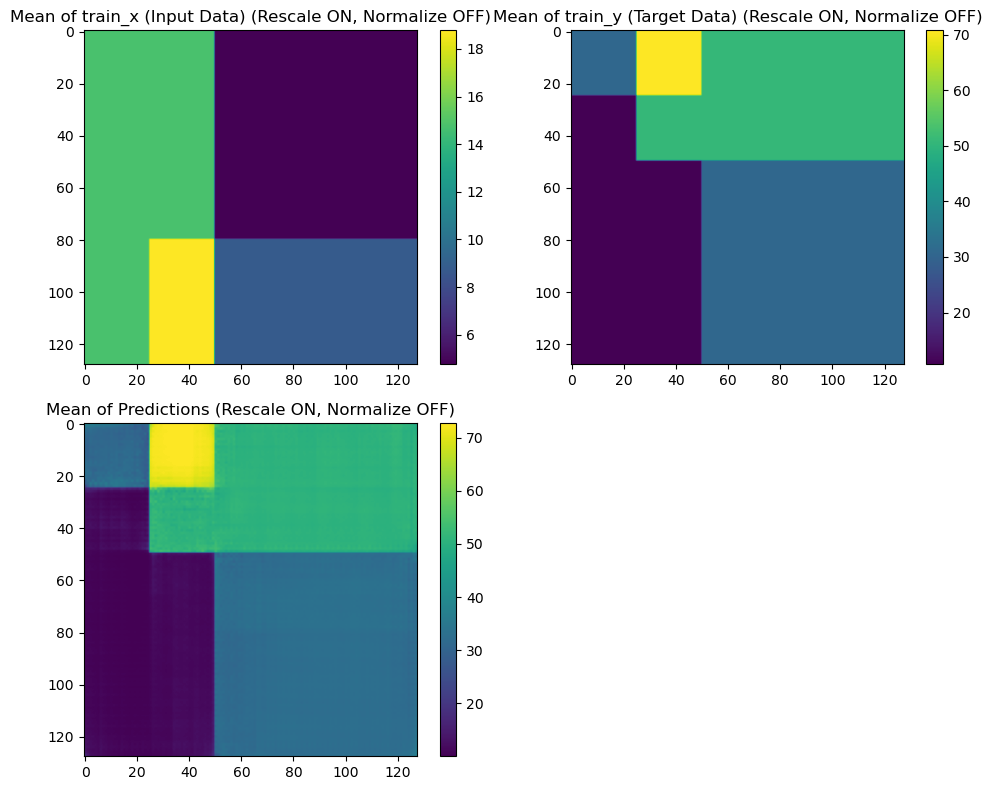

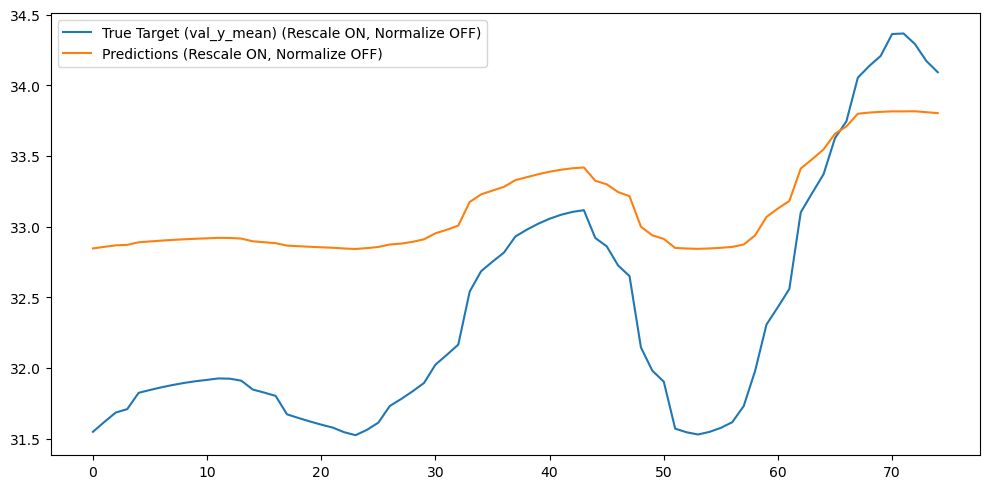

Rescale ON, Normalize OFF: RMSE = 1.5547, COR = 0.9967
Normalize ON, Rescale OFF


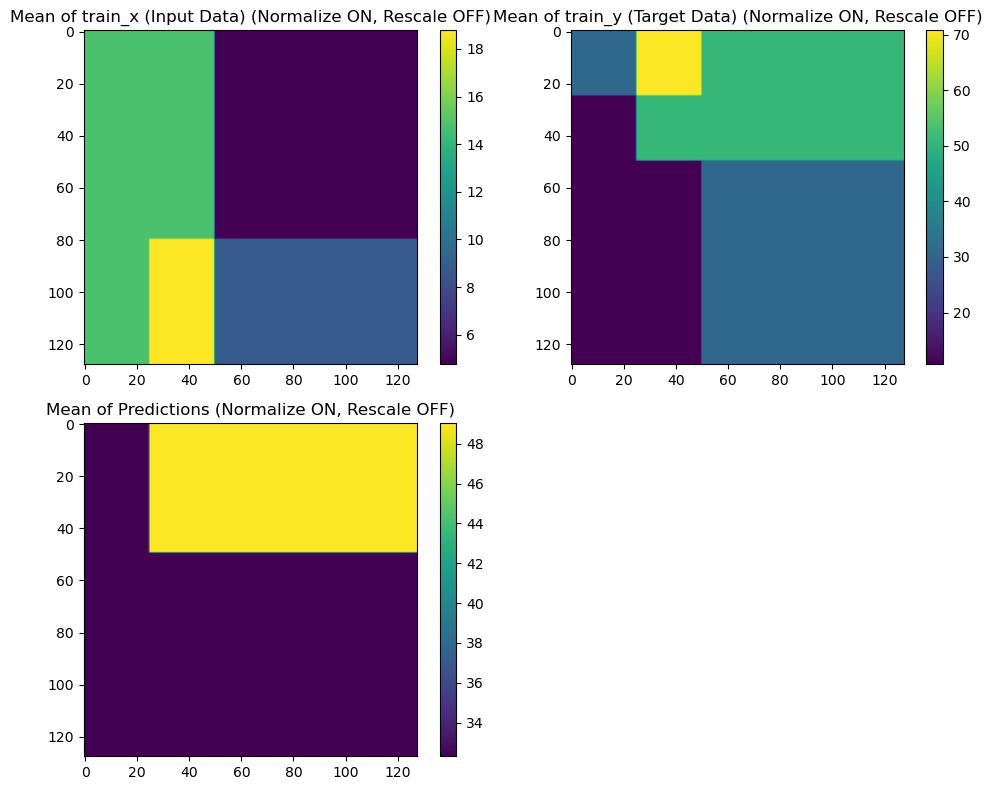

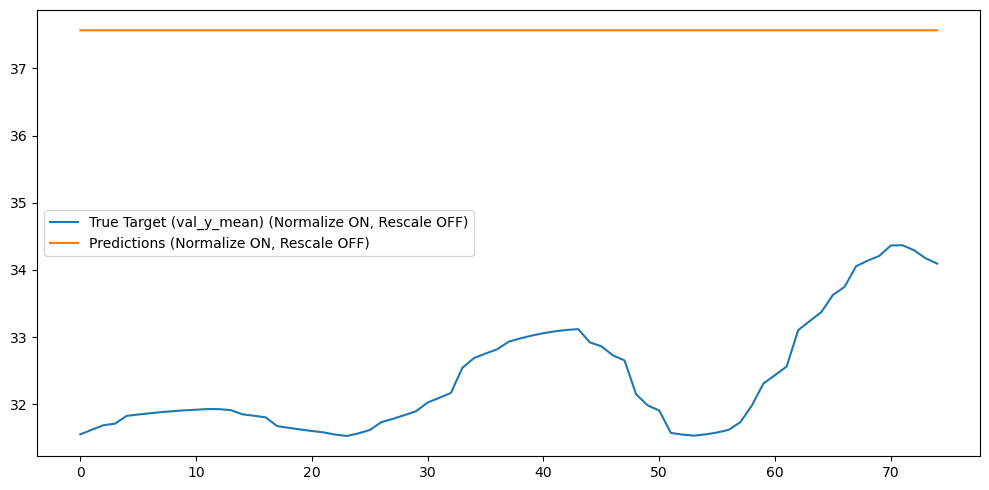

Normalize ON, Rescale OFF: RMSE = 12.1488, COR = 0.8452
Neither ON


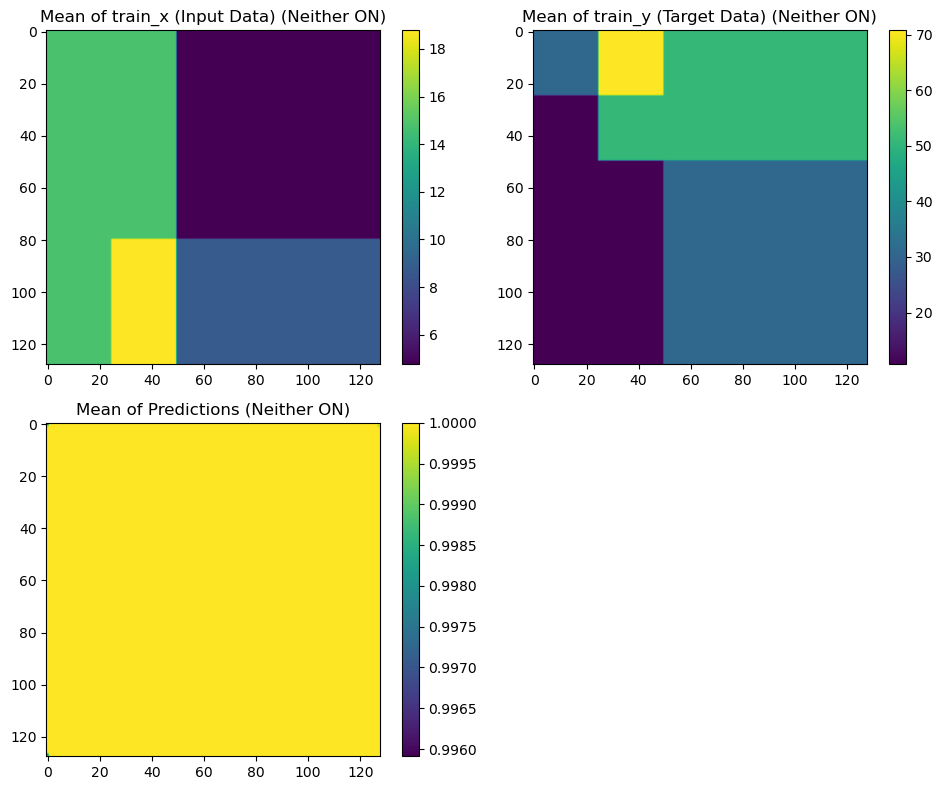

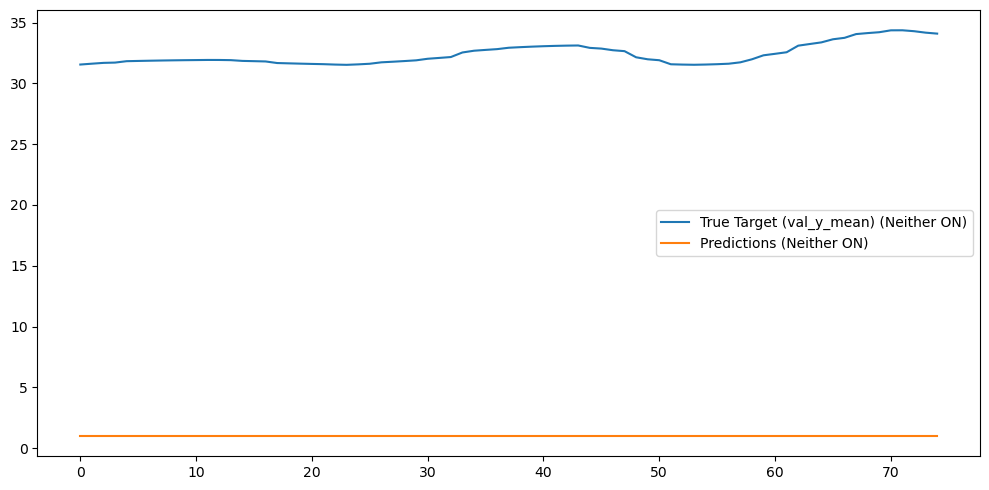

Neither ON: RMSE = 35.5777, COR = 0.0043
Both ON


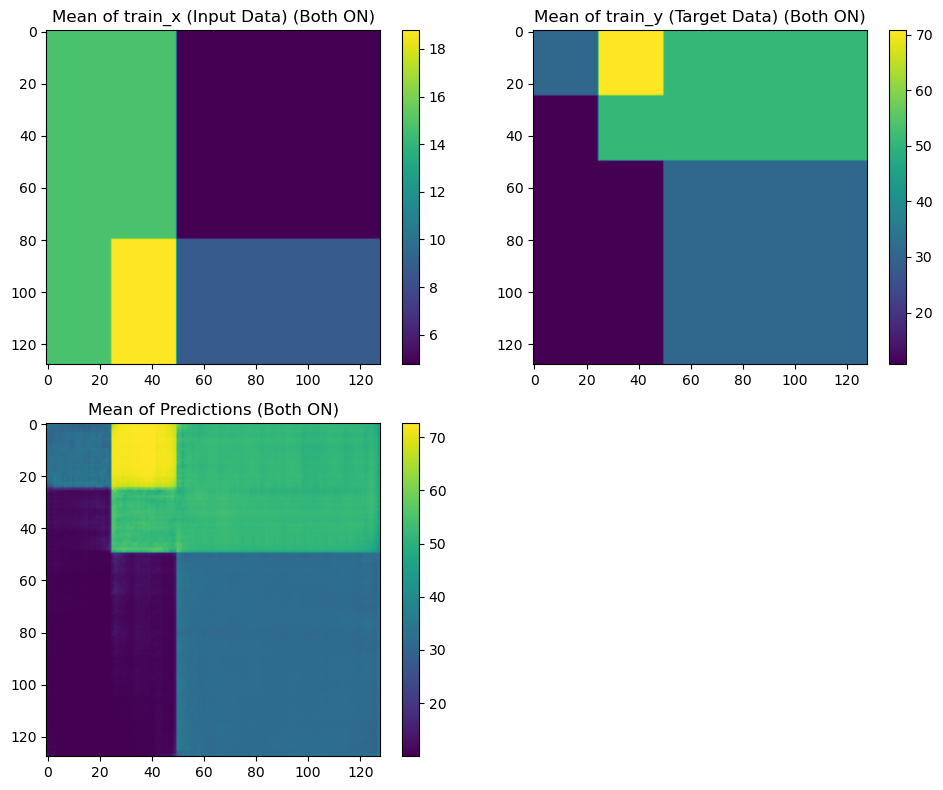

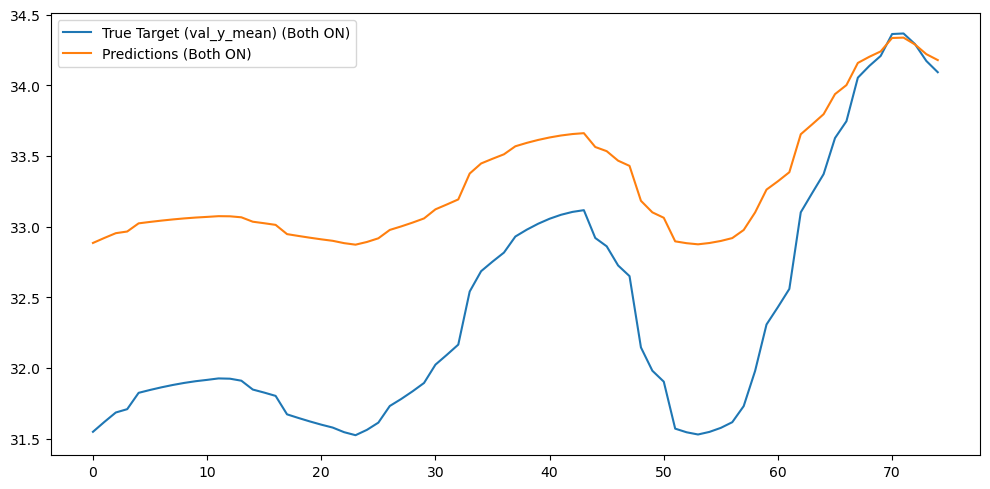

Both ON: RMSE = 1.6425, COR = 0.9969


Scenario       RMSE       COR
0  Rescale ON, Normalize OFF   1.554655  0.996680
1  Normalize ON, Rescale OFF  12.148827  0.845154
2                 Neither ON  35.577723  0.004333
3                    Both ON   1.642472  0.996856

In [5]:
import pandas as pd

# Initialize a list to store statistics
stats_list = []

# Visualize predictions for all four scenarios
for scenario in scenarios:
    scenario_name = scenario["name"]
    print(scenario_name)
    predictions_restored = predictions_dict[scenario_name]
    
    # 1. Plot the mean visualizations for train_x, train_y, and predictions
    plot_mean_visualizations(train_x, train_y, predictions_restored, title_suffix=f"({scenario_name})")
    
    # 2. Plot time series comparisons of val_y mean vs predictions mean
    val_y_mean = np.mean(val_y, axis=(1, 2, 3))  # Mean across all spatial dimensions for time series
    predictions_mean_time = np.mean(predictions_restored, axis=(1, 2, 3))  # Mean for predictions across same dims
    
    plot_time_series(val_y_mean, predictions_mean_time, title_suffix=f"({scenario_name})")

    # 3. Calculate RMSE and COR
    rmse_value = calculate_rmse(val_y, predictions_restored)
    corr_value = calculate_corr(val_y, predictions_restored)
    
    # 4. Display RMSE and COR in the console
    print(f"{scenario_name}: RMSE = {rmse_value:.4f}, COR = {corr_value:.4f}")
    
    # Append statistics to the list
    stats_list.append({"Scenario": scenario_name, "RMSE": rmse_value, "COR": corr_value})

# Create a DataFrame from the list of statistics
stats_df = pd.DataFrame(stats_list)
stats_df
